# Clustering


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustertend import hopkins, vat
from sklearn.metrics import silhouette_score, silhouette_samples
import sys
import matplotlib.cm as cm

#### _1.1 Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos_


<small>

**Variables que no aportan información para clústering:**

Es importante resaltar que clustering se maneja por medio de valores numéricos. Por lo tanto, los valores que no aportan información para clústering son:

1. **id:** Es solo el identificador único, no tiene relevancia para la agrupación.
2. **homepage:** Debido a que es una URL, no aporta valor numérico o categórico relevante.
3. **originalTile y title:** Es el nombre de las películas, no aportan información cuantificable.
4. **originalLanguage:** Es una variable categórica con demasiadas clases, no es relevante para el clústering.
5. **releaseDate:** Es una fecha que no aporta información numérica útil directamente.
6. **director, actor, actorsCharacter:** Son nombres de personas, no datos útiles para análisis cuantitativo.
7. **video:** Contiene valores _True/False_, lo cual no es tan útil para el clustering en este caso.
8. **productionCompany, productionCompanyCountry, productionCountry, genres:** Su formato textual dificulta el uso de clustering.

</small>


<small>

**Variables Seleccionadas para Calcular los Grupos**

Cabe resaltar que todas las variables seleccionadas para calcular grupos, son de tipo cuantitativo.

1. budget
2. revenue
3. popularity
4. voteAvg
5. voteCount
6. runtime
7. genresAmount
8. productionCoAmount
9. productionCountriesAmount
10. actosPopularity
11. actorsAmount
12. castWomenAmount
13. castMenAmount
    </small>


### Análisis de agrupamientos de datos realizados


<small>

1. **Métricas Financieras**

   - **budget**
   - **revenue**  
     _*Razonamiento:*_ Estas dos variables resumen la inversión realizada y el retorno económico, fundamentales para evaluar el desempeño financiero de una película.

2. **Recepción y Evaluación del Público**

   - **popularity**
   - **voteAvg**
   - **voteCount**  
     _*Razonamiento:*_ Aquí se agrupan indicadores de cómo es percibida la película por el público: el interés general (popularity), la calificación promedio y la cantidad de votos.

3. **Características de Producción – Parte 1**

   - **runtime**
   - **genresAmount**  
     _*Razonamiento:*_ La duración y la cantidad de géneros pueden influir en el estilo y la estructura narrativa, afectando la producción y el posicionamiento en el mercado.

4. **Características de Producción – Parte 2**

   - **productionCoAmount**
   - **productionCountriesAmount**  
     _*Razonamiento:*_ Estas variables reflejan la complejidad y el alcance de la producción (número de compañías y países involucrados), lo cual puede relacionarse con estrategias de distribución y coproducción.

5. **Métricas del Elenco – Cantidad y Popularidad**

   - **actorsAmount**
   - **actorsPopularity**  
     _*Razonamiento:*_ El tamaño del elenco y la popularidad agregada de los actores son clave para estimar el atractivo comercial de la película.

6. **Distribución de Género en el Elenco**
   - **castWomenAmount**
   - **castMenAmount**  
     _*Razonamiento:*_ Conocer la distribución por género permite analizar la diversidad y podría tener implicaciones en el posicionamiento de marca o en campañas de marketing.

---

**Resumen del agrupamiento:**

- **Grupo 1 (Finanzas):** budget, revenue
- **Grupo 2 (Recepción):** popularity, voteAvg, voteCount
- **Grupo 3 (Producción – 1):** runtime, genresAmount
- **Grupo 4 (Producción – 2):** productionCoAmount, productionCountriesAmount
- **Grupo 5 (Elenco – Cantidad/Popularidad):** actorsAmount, actorsPopularity
- **Grupo 6 (Elenco – Género):** castWomenAmount, castMenAmount

</small>


### Limpieza de filas con datos no númericos en filas numéricas y filas con columnas sin valor en el dataset


In [45]:
file_path = "movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Seleccionar las variables cuantitativas para clustering
columnas = ['budget', 'revenue', 'runtime', 'actorsPopularity_avg', 'popularity',
            'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 
            'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Promediar la popularidad de los actores debido a divisione con '|'
def promedio_actors_popularity(cadena):
    try:
        valores = [pd.to_numeric(x, errors='coerce') for x in cadena.split('|')]
        return np.nanmean(valores)
    except:
        return np.nan

df['actorsPopularity_avg'] = df['actorsPopularity'].apply(promedio_actors_popularity)

# Convertir las columnas a numérico
for col in columnas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Definir los grupos de variables según las dimensiones conceptuales

# Grupo 1: Variables de rendimiento financiero
group1_features = ["budget", "revenue"]

# Grupo 2: Variables de recepcion de la audiencia
group2_features = ["popularity", "voteAvg"]

# El vountCount no será tomado ya que es repetitivo con la variable voteAvg

# Grupo 3: Variables de produccion 1
group3_features = ["runtime", "genresAmount"]

# Grupo 4: Variables de produccion 2
group4_features = ["productionCoAmount", "productionCountriesAmount"]

# Grupo 5: Variables de elenco - cantidad/popularidad
group5_features = ["actorsAmount", "actorsPopularity_avg"]

# Grupo 6: Variables de elenco - cantidad de mujeres/hombres
group6_features = ["castWomenAmount", "castMenAmount"]

# Crear los DataFrames para cada grupo
df_group1 = df[group1_features].copy()
df_group1.dropna(inplace=True)

df_group2 = df[group2_features].copy()
df_group2.dropna(inplace=True)

df_group3 = df[group3_features].copy()
df_group3.dropna(inplace=True)

df_group4 = df[group4_features].copy()
df_group4.dropna(inplace=True)

df_group5 = df[group5_features].copy()
df_group5.dropna(inplace=True)

df_group6 = df[group6_features].copy()
df_group6.dropna(inplace=True)


C:\Users\ncast\AppData\Local\Temp\ipykernel_10312\2463140158.py:13: RuntimeWarning: Mean of empty slice
  return np.nanmean(valores)


#### _1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones._


In [46]:
# Asegurarse de que todas las columnas sean numéricas y manejar valores nulos (usando la mediana)
for group in [df_group1, df_group2, df_group3, df_group4, df_group5, df_group6]:
    for col in group.columns:
        group[col] = pd.to_numeric(group[col], errors='coerce')
    group.fillna(group.median(numeric_only=True), inplace=True)

# Normalizar cada grupo de variables
group1_scaled = scale(df_group1)
group2_scaled = scale(df_group2)
group3_scaled = scale(df_group3)
group4_scaled = scale(df_group4)
group5_scaled = scale(df_group5)
group6_scaled = scale(df_group6)

# Calcular el estadístico de Hopkins para cada grupo
hopkins_group1 = hopkins(group1_scaled, group1_scaled.shape[0])
hopkins_group2 = hopkins(group2_scaled, group2_scaled.shape[0])
hopkins_group3 = hopkins(group3_scaled, group3_scaled.shape[0])
hopkins_group4 = hopkins(group4_scaled, group4_scaled.shape[0])
hopkins_group5 = hopkins(group5_scaled, group5_scaled.shape[0])
hopkins_group6 = hopkins(group6_scaled, group6_scaled.shape[0])

print("\nEstadístico de Hopkins para cada grupo:")
print("Hopkins statistic for Group 1 (Rendimiento financiero): {:.4f}".format(hopkins_group1))
print("Hopkins statistic for Group 2 (Recepción de la audiencia): {:.4f}".format(hopkins_group2))
print("Hopkins statistic for Group 3 (Producción 1): {:.4f}".format(hopkins_group3))
print("Hopkins statistic for Group 4 (Producción 2): {:.4f}".format(hopkins_group4))
print("Hopkins statistic for Group 5 (Elenco - cantidad/popularidad): {:.4f}".format(hopkins_group5))
print("Hopkins statistic for Group 6 (Elenco - cantidad de mujeres/hombres): {:.4f}".format(hopkins_group6))


print("\nEstadístico de VAT para cada grupo:")
# 4. Visual Assessment of Cluster Tendency (VAT)
def plot_vat(data, group_name):
    if data.shape[0] > 5000:
        # Si el número de registros excede 5000, no se calcula la VAT
        print(f"VAT para {group_name} omitida: el conjunto de datos tiene {data.shape[0]} registros, lo que excede el límite para una visualización efectiva.")
    else:
        print(f"VAT para {group_name}")
        vat(data)

# Visualizar (o discutir la imposibilidad de visualizar) la VAT para cada grupo
plot_vat(group1_scaled, "Grupo 1 (Rendimiento financiero)")
plot_vat(group2_scaled, "Grupo 2 (Recepción de la audiencia)")
plot_vat(group3_scaled, "Grupo 3 (Producción 1)")
plot_vat(group4_scaled, "Grupo 4 (Producción 2)")
plot_vat(group5_scaled, "Grupo 5 (Elenco - cantidad/popularidad)")
plot_vat(group6_scaled, "Grupo 6 (Elenco - cantidad de mujeres/hombres)")


Estadístico de Hopkins para cada grupo:
Hopkins statistic for Group 1 (Rendimiento financiero): 0.0106
Hopkins statistic for Group 2 (Recepción de la audiencia): 0.0031
Hopkins statistic for Group 3 (Producción 1): 0.0010
Hopkins statistic for Group 4 (Producción 2): 0.0006
Hopkins statistic for Group 5 (Elenco - cantidad/popularidad): 0.0013
Hopkins statistic for Group 6 (Elenco - cantidad de mujeres/hombres): 0.0018

Estadístico de VAT para cada grupo:
VAT para Grupo 1 (Rendimiento financiero) omitida: el conjunto de datos tiene 10000 registros, lo que excede el límite para una visualización efectiva.
VAT para Grupo 2 (Recepción de la audiencia) omitida: el conjunto de datos tiene 10000 registros, lo que excede el límite para una visualización efectiva.
VAT para Grupo 3 (Producción 1) omitida: el conjunto de datos tiene 10000 registros, lo que excede el límite para una visualización efectiva.
VAT para Grupo 4 (Producción 2) omitida: el conjunto de datos tiene 10000 registros, lo que

<small>

### **Análisis de Hopkins**

1.  Grupo 1 (Rendimiento financiero – budget y revenue):
    Hopkins = 0.0108

    Este valor, extremadamente cercano a cero, indica que las variables relacionadas con el rendimiento financiero presentan una estructura de agrupamiento muy marcada, es decir, los datos no se distribuyen al azar sino que tienen patrones claros.

2.  Grupo 2 (Recepción de la audiencia – popularity, voteAvg y voteCount):
    Hopkins = 0.0032

    La baja puntuación sugiere que existe una tendencia fuerte a la formación de clusters, lo cual permite segmentar las respuestas de la audiencia en grupos significativos.

3.  Grupo 3 (Producción 1 – runtime y genresAmount):
    Hopkins = 0.0010

    Con un valor tan bajo, se evidencia que estas variables comparten patrones de comportamiento que favorecen la formación de clusters bien diferenciados.

4.  Grupo 4 (Producción 2 – productionCoAmount y productionCountriesAmount):
    Hopkins = 0.0006

    Este resultado demuestra una agrupación extremadamente definida, lo que sugiere que la complejidad y el alcance de la producción (en términos de número de compañías y países) están fuertemente estructurados.

5.  Grupo 5 (Elenco – cantidad y popularidad: actorsAmount y actorsPopularity):
    Hopkins = 0.0013

    Este valor indica que la distribución en cuanto al número de actores y su popularidad exhibe patrones naturales que permiten una clara segmentación.

6.  Grupo 6 (Elenco – cantidad de mujeres y hombres: castWomenAmount y castMenAmount):
    Hopkins = 0.0018

    A pesar de ser ligeramente superior al de algunos otros grupos, este valor continúa siendo extremadamente bajo, confirmando la presencia de una tendencia a formar clusters dentro de estas variables.

### **Análisis de VAT**

La aplicación de la técnica de Visual Assessment of Cluster Tendency (VAT) fue omitida para cada grupo, ya que el conjunto de datos cuenta con registros superiores a 5000, lo que excede el límite para una visualización efectiva.
La técnica VAT es una herramienta muy útil para identificar visualmente la existencia de grupos naturales, ya que reordena la matriz de disimilitud de manera que se pueden observar bloques oscuros representativos de clusters. Sin embargo, en conjuntos de datos muy grandes, la complejidad y el elevado número de elementos dificultan la interpretación de la matriz de disimilitud, haciendo que la visualización no aporte información clara ni concluyente.
</small>


#### _1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará._


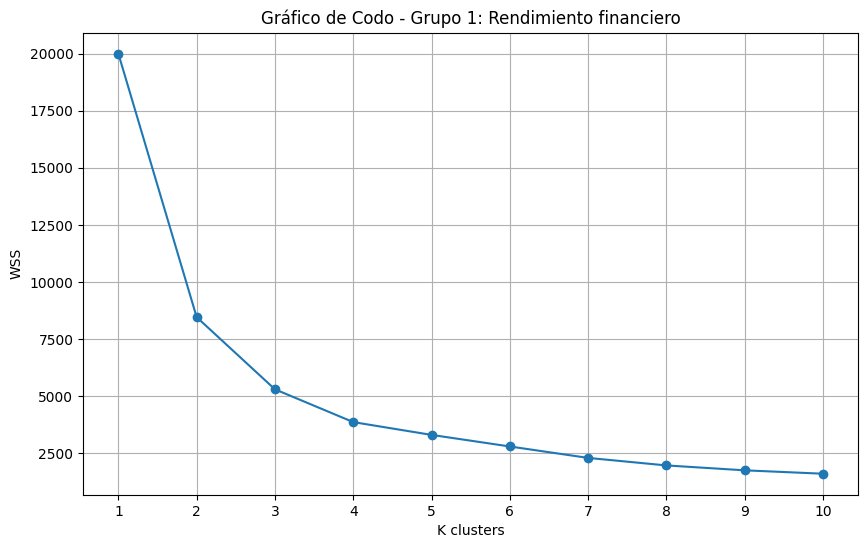

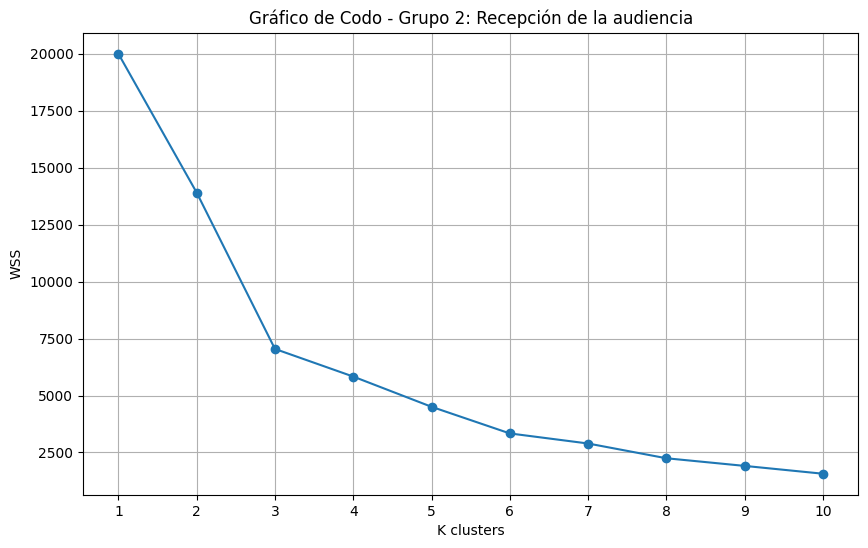

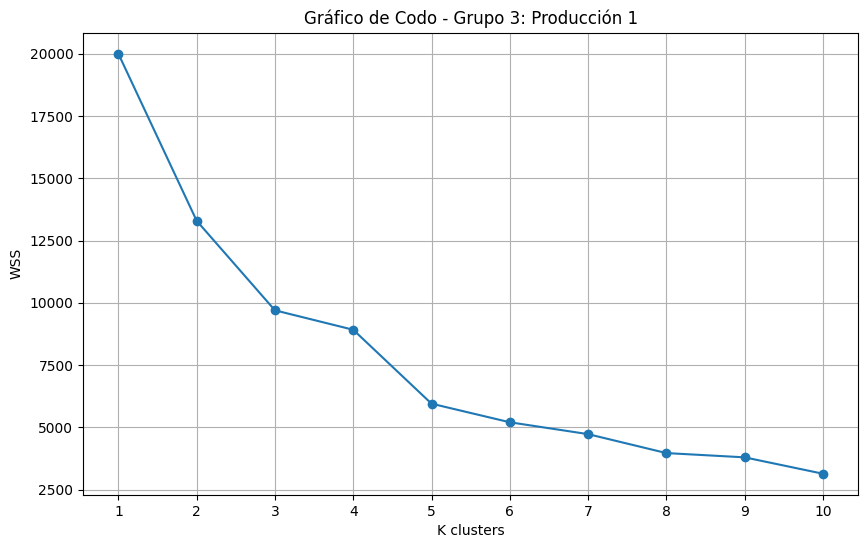

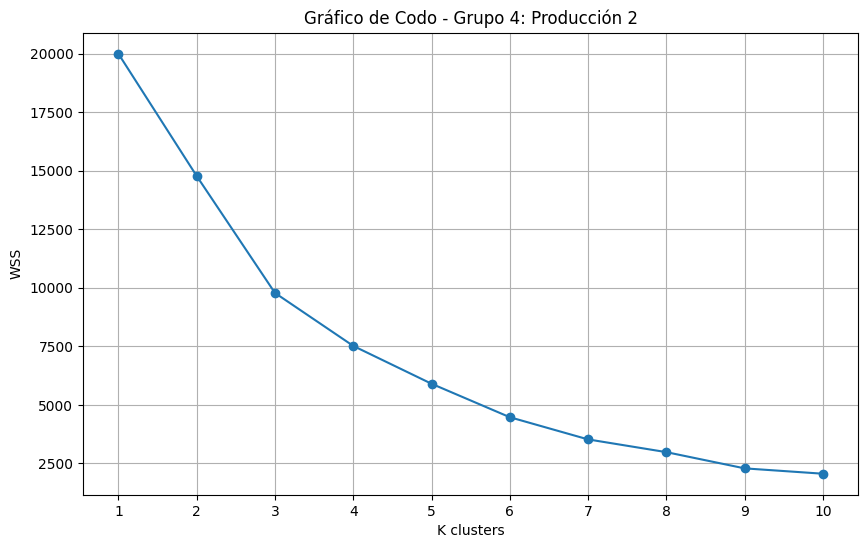

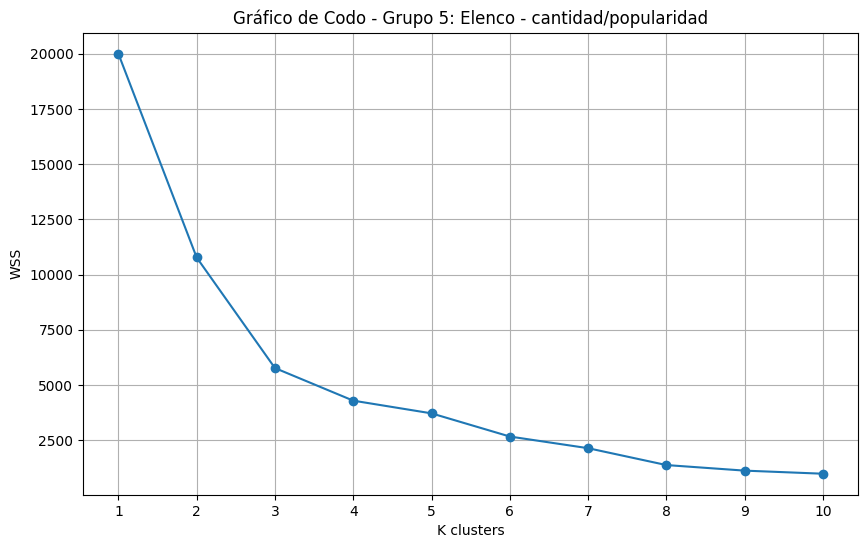

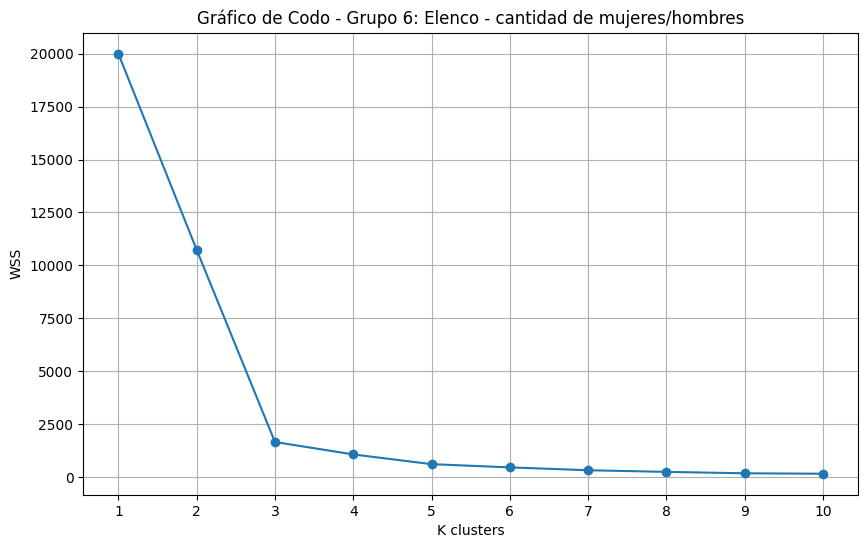

In [47]:
def elbow_plot_for_group(features, group_name):
    # Extraer el subconjunto de datos para el grupo
    df_group = df[features].copy()
    # Convertir a numérico y llenar valores faltantes con la mediana
    for col in features:
        df_group[col] = pd.to_numeric(df_group[col], errors='coerce')
    df_group.fillna(df_group.median(numeric_only=True), inplace=True)
    
    # Normalizar los datos
    X_scale = scale(df_group)
    
    # Aplicar el método del codo
    numeroClusters = range(1, 11)
    wcss = []
    for i in numeroClusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scale)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(numeroClusters, wcss, marker='o')
    plt.xticks(numeroClusters)
    plt.xlabel("K clusters")
    plt.ylabel("WSS")
    plt.title(f"Gráfico de Codo - {group_name}")
    plt.grid(True)
    plt.show()

# Generar la gráfica del codo para cada grupo:
elbow_plot_for_group(group1_features, "Grupo 1: Rendimiento financiero")
elbow_plot_for_group(group2_features, "Grupo 2: Recepción de la audiencia")
elbow_plot_for_group(group3_features, "Grupo 3: Producción 1")
elbow_plot_for_group(group4_features, "Grupo 4: Producción 2")
elbow_plot_for_group(group5_features, "Grupo 5: Elenco - cantidad/popularidad")
elbow_plot_for_group(group6_features, "Grupo 6: Elenco - cantidad de mujeres/hombres")

<small>

### Análisis de gráfica de codo

**Grupo 1: Rendimiento financiero**

_Variables: budget, revenue_

Observaciones de la curva:

1. Inicia con un valor de WSS alto en k=1 y desciende de manera marcada hasta k=2 y k=3.
2. Entre k=3 y k=4 sigue habiendo una reducción importante, pero algo menor que en los pasos anteriores.

**Selección de la cantidad de clústers:**
El codo más notorio se ubica en k=2.

**Grupo 2: Recepción de la audiencia**

\_Variables: popularity, voteAvg

Observaciones de la curva:

1. Se registra un gran descenso de k=1 a k=2 y nuevamente de k=2 a k=3.
2. La curva mantiene descensos considerables hasta alrededor de k=4.
3. A partir de k=6 o k=7, la reducción de WSS es menos pronunciada, y la curva se va “aplanando” de forma más clara.

**Selección de la cantidad de clústers:**
El codo más marcado se aprecia en k=3.

**Grupo 3: Producción 1**

_Variables: runtime, genresAmount_

Observaciones de la curva:

1. Desciende rápidamente desde k=1 hasta k=3 o k=4.
2. Después de k=4, la pendiente se hace menos evidente.

**Selección de la cantidad de clústers:**
El codo se identifica de manera más pronunciada en k=4.

**Grupo 4: Producción 2**

_Variables: productionCoAmount, productionCountriesAmount_

Observaciones de la curva:

1. Presenta una caída marcada de k=1 a k=2 y de k=2 a k=3.
2. Entre k=3 y k=4 el descenso es moderado, pero de k=4 a k=5 vuelve a ser más evidente.

**Selección de la cantidad de clústers:**
El codo se aprecia con mayor claridad en k=5.

**Grupo 5: Elenco - Cantidad y Popularidad**

_Variables: actorsAmount, actorsPopularity_

Observaciones de la curva:

1. Presenta una gran caída de k=1 a k=2 y de k=2 a k=3.
2. A partir de k=3, la curva se aplana, indicando un menor cambio al incrementar el número de clústers.

**Selección de la cantidad de clústers:**
El codo más evidente aparece en k=3.

**Grupo 6: Elenco - Género**

_Variables: castWomenAmount, castMenAmount_

Observaciones de la curva:

1. Se observa una fuerte reducción de k=1 a k=2 y de k=2 a k=3.
2. A partir de k=3 la curva se va "aplanando"

**Selección de la cantidad de clústers:**
El "codo" es mas claro se encuentra en k=3

</small>


#### _1.4 Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno._


#### Cálculo k-medias


K-Means Grupo 1 (Rendimiento financiero):
 KMeans(n_clusters=2)
Centroides Grupo 1:
 [[-0.21116776 -0.19666914]
 [ 2.92654035  2.72560633]]


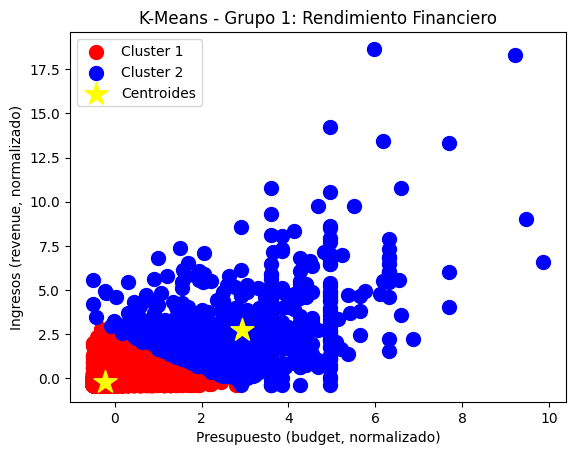


K-Means Grupo 2 (Recepción):
 KMeans(n_clusters=3)
Centroides Grupo 2:
 [[ 1.05387905e-02  6.66040908e-01]
 [-7.31289974e-02 -9.07947730e-01]
 [ 2.76525212e+01  9.19910681e-01]]


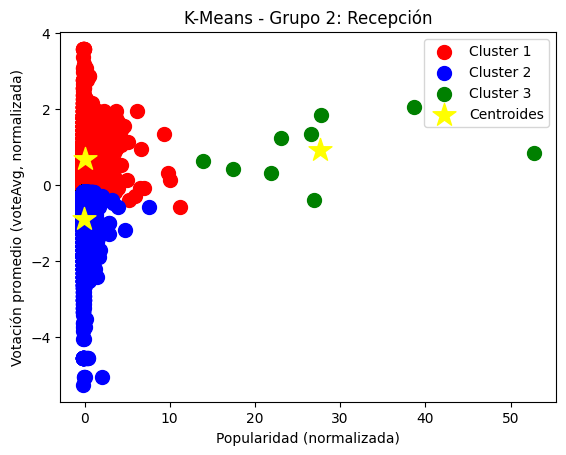


K-Means Grupo 3 (Producción 1):
 KMeans(n_clusters=4)
Centroides Grupo 3:
 [[-0.3258366  -1.39047883]
 [ 1.1085951   0.04199536]
 [-0.2277256   1.56561247]
 [-0.33594918 -0.10488793]]


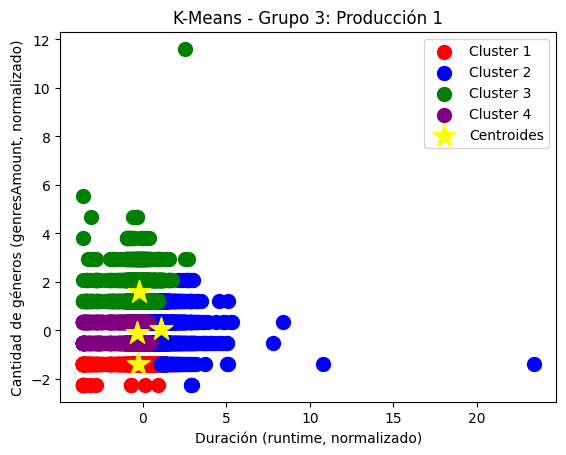


K-Means Grupo 4 (Producción 2):
 KMeans(n_clusters=4)
Centroides Grupo 4:
 [[-0.48973945 -0.12808387]
 [ 3.36419744  0.38751793]
 [-0.75421011  6.35105038]
 [ 0.75554788 -0.02570186]]


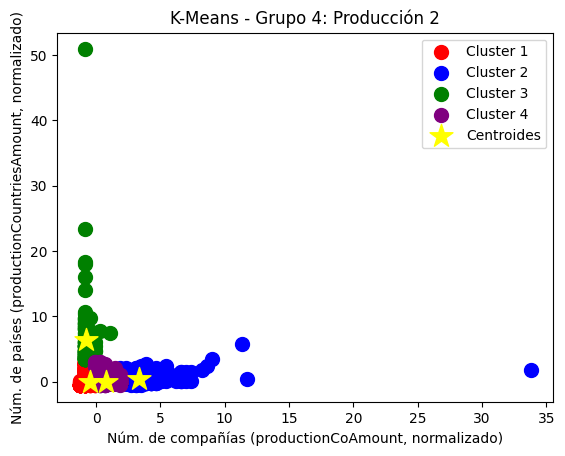


K-Means Grupo 5 (Elenco - cantidad/popularidad):
 KMeans(n_clusters=3)
Centroides Grupo 5:
 [[-0.03470031 -0.49465397]
 [-0.03864033  1.01917423]
 [25.34750751  2.24958665]]


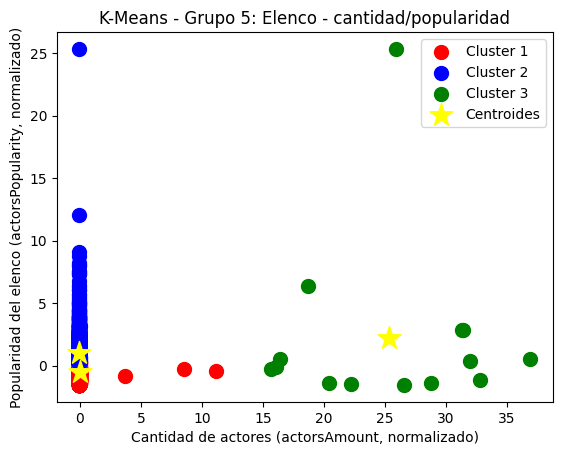


K-Means Grupo 6 (Elenco - cantidad de mujeres/hombres):
 KMeans(n_clusters=3)
Centroides Grupo 6:
 [[-0.33414308 -0.1506492 ]
 [-0.54260792  5.95136894]
 [ 1.65192593 -0.16195774]]


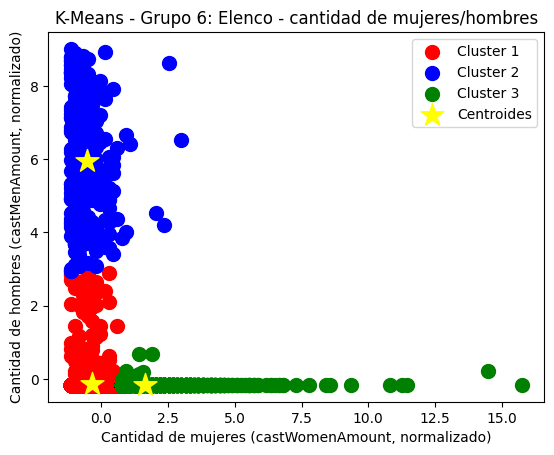

In [48]:
# -------------- GRUPO 1: Rendimiento financiero --------------
X1 = scale(df_group1)  

# K-Means 
km_g1 = KMeans(n_clusters=2).fit(X1)
print("K-Means Grupo 1 (Rendimiento financiero):\n", km_g1)

# Centroides de los clusters
centroides_g1 = km_g1.cluster_centers_
print("Centroides Grupo 1:\n", centroides_g1)

# Predicción de clusters
especies_g1 = km_g1.predict(X1)

# Gráfica 
plt.scatter(X1[especies_g1 == 0, 0], X1[especies_g1 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X1[especies_g1 == 1, 0], X1[especies_g1 == 1, 1], s=100, c='blue', label="Cluster 2")

# Centroides (también en 2D)
plt.scatter(centroides_g1[:,0], centroides_g1[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 1: Rendimiento Financiero")
plt.xlabel("Presupuesto (budget, normalizado)")
plt.ylabel("Ingresos (revenue, normalizado)")
plt.legend()
plt.show()


# -------------- GRUPO 2: Recepción --------------
X2 = scale(df_group2)

km_g2 = KMeans(n_clusters=3).fit(X2)
print("\nK-Means Grupo 2 (Recepción):\n", km_g2)

centroides_g2 = km_g2.cluster_centers_
print("Centroides Grupo 2:\n", centroides_g2)

especies_g2 = km_g2.predict(X2)

plt.scatter(X2[especies_g2 == 0, 0], X2[especies_g2 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X2[especies_g2 == 1, 0], X2[especies_g2 == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X2[especies_g2 == 2, 0], X2[especies_g2 == 2, 1], s=100, c='green', label="Cluster 3")

plt.scatter(centroides_g2[:,0], centroides_g2[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 2: Recepción")
plt.xlabel("Popularidad (normalizada)")
plt.ylabel("Votación promedio (voteAvg, normalizada)")
plt.legend()
plt.show()


# -------------- GRUPO 3: Producción 1 --------------
X3 = scale(df_group3)

km_g3 = KMeans(n_clusters=4).fit(X3)
print("\nK-Means Grupo 3 (Producción 1):\n", km_g3)

centroides_g3 = km_g3.cluster_centers_
print("Centroides Grupo 3:\n", centroides_g3)

especies_g3 = km_g3.predict(X3)

plt.scatter(X3[especies_g3 == 0, 0], X3[especies_g3 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X3[especies_g3 == 1, 0], X3[especies_g3 == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X3[especies_g3 == 2, 0], X3[especies_g3 == 2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(X3[especies_g3 == 3, 0], X3[especies_g3 == 3, 1], s=100, c='purple', label="Cluster 4")

plt.scatter(centroides_g3[:,0], centroides_g3[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 3: Producción 1")
plt.xlabel("Duración (runtime, normalizado)")
plt.ylabel("Cantidad de géneros (genresAmount, normalizado)")
plt.legend()
plt.show()


# -------------- GRUPO 4: Producción 2 --------------
X4 = scale(df_group4)

km_g4 = KMeans(n_clusters=4).fit(X4)
print("\nK-Means Grupo 4 (Producción 2):\n", km_g4)

centroides_g4 = km_g4.cluster_centers_
print("Centroides Grupo 4:\n", centroides_g4)

especies_g4 = km_g4.predict(X4)

plt.scatter(X4[especies_g4 == 0, 0], X4[especies_g4 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X4[especies_g4 == 1, 0], X4[especies_g4 == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X4[especies_g4 == 2, 0], X4[especies_g4 == 2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(X4[especies_g4 == 3, 0], X4[especies_g4 == 3, 1], s=100, c='purple', label="Cluster 4")

plt.scatter(centroides_g4[:,0], centroides_g4[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 4: Producción 2")
plt.xlabel("Núm. de compañías (productionCoAmount, normalizado)")
plt.ylabel("Núm. de países (productionCountriesAmount, normalizado)")
plt.legend()
plt.show()


# -------------- GRUPO 5: Elenco - cantidad/popularidad --------------
X5 = scale(df_group5)

km_g5 = KMeans(n_clusters=3).fit(X5)
print("\nK-Means Grupo 5 (Elenco - cantidad/popularidad):\n", km_g5)

centroides_g5 = km_g5.cluster_centers_
print("Centroides Grupo 5:\n", centroides_g5)

especies_g5 = km_g5.predict(X5)

plt.scatter(X5[especies_g5 == 0, 0], X5[especies_g5 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X5[especies_g5 == 1, 0], X5[especies_g5 == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X5[especies_g5 == 2, 0], X5[especies_g5 == 2, 1], s=100, c='green', label="Cluster 3")

plt.scatter(centroides_g5[:,0], centroides_g5[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 5: Elenco - cantidad/popularidad")
plt.xlabel("Cantidad de actores (actorsAmount, normalizado)")
plt.ylabel("Popularidad del elenco (actorsPopularity, normalizado)")
plt.legend()
plt.show()


# -------------- GRUPO 6: Elenco - cantidad de mujeres/hombres --------------
X6 = scale(df_group6)

km_g6 = KMeans(n_clusters=3).fit(X6)
print("\nK-Means Grupo 6 (Elenco - cantidad de mujeres/hombres):\n", km_g6)

centroides_g6 = km_g6.cluster_centers_
print("Centroides Grupo 6:\n", centroides_g6)

especies_g6 = km_g6.predict(X6)

plt.scatter(X6[especies_g6 == 0, 0], X6[especies_g6 == 0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X6[especies_g6 == 1, 0], X6[especies_g6 == 1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X6[especies_g6 == 2, 0], X6[especies_g6 == 2, 1], s=100, c='green', label="Cluster 3")

plt.scatter(centroides_g6[:,0], centroides_g6[:,1], s=300, c="yellow", marker="*", label="Centroides")
plt.title("K-Means - Grupo 6: Elenco - cantidad de mujeres/hombres")
plt.xlabel("Cantidad de mujeres (castWomenAmount, normalizado)")
plt.ylabel("Cantidad de hombres (castMenAmount, normalizado)")
plt.legend()
plt.show()


#### Clúster Jerárquico


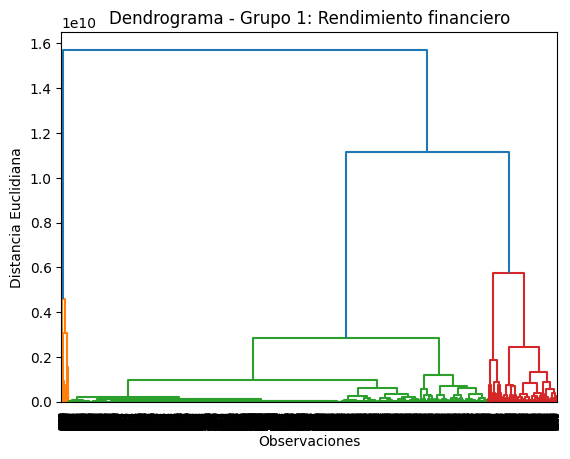

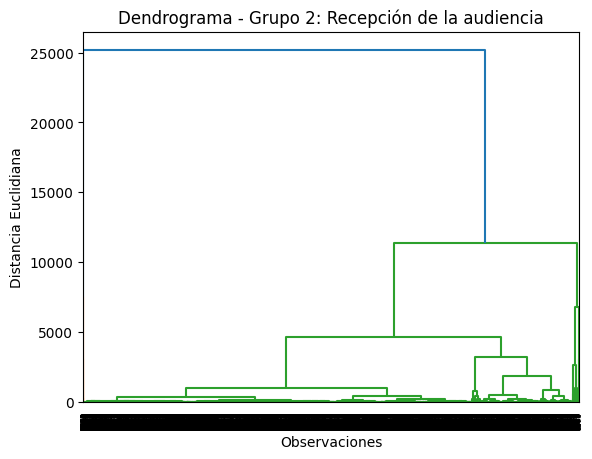

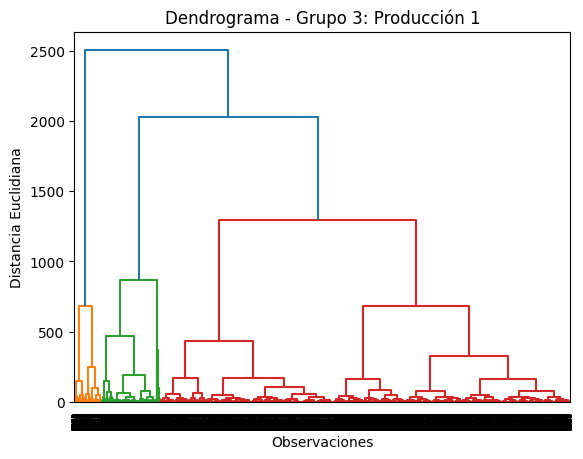

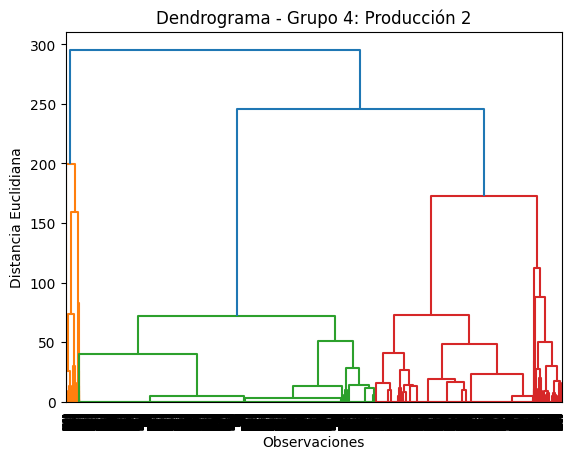

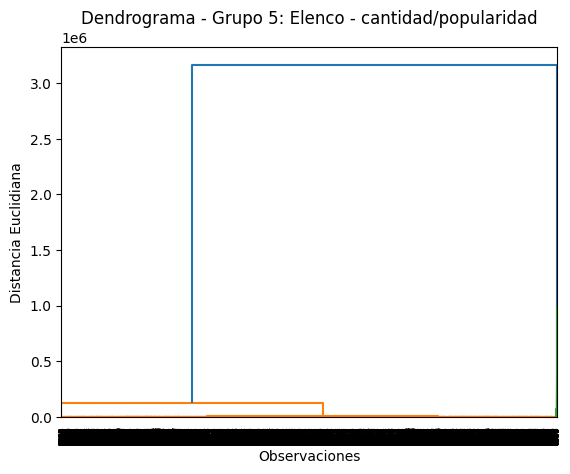

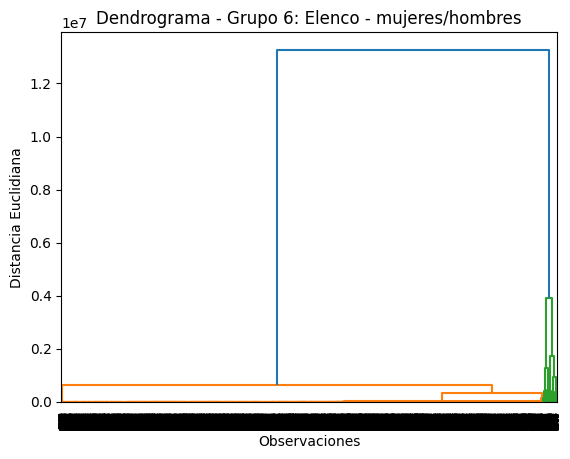

In [49]:
sys.setrecursionlimit(15000)

def hierarchical_clustering(X, group_label):    

    sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title("Dendrograma - " + group_label)
    plt.xlabel("Observaciones")
    plt.ylabel("Distancia Euclidiana")
    plt.show()

hierarchical_clustering(df_group1, "Grupo 1: Rendimiento financiero")
hierarchical_clustering(df_group2, "Grupo 2: Recepción de la audiencia")
hierarchical_clustering(df_group3, "Grupo 3: Producción 1")
hierarchical_clustering(df_group4, "Grupo 4: Producción 2",)
hierarchical_clustering(df_group5, "Grupo 5: Elenco - cantidad/popularidad")
hierarchical_clustering(df_group6, "Grupo 6: Elenco - mujeres/hombres")

<small>

## **Análisis comparativo entre los gráficos**

### **Grupo 1: Rendimiento financiero**

**K-Means:**

a. Se observa un gran cluster con películas de bajo presupuesto y bajos ingresos (rojo) y un cluster menor para valores más altos (azul).

b. El centroides amarillo y azul se ubican en regiones donde se concentra la mayor parte de los datos.

**Clustering Jerárquico (Dendrograma):**

a. Se aprecia una gran masa de datos que se agrupan muy cerca de la base del dendrograma (películas con presupuestos e ingresos bajos).

b. Algunas ramas se separan a distancias mayores, lo que sugiere que las películas con altísimo presupuesto/ingresos se fusionan al final.

**Comparación:**

Ambos métodos coinciden en que existe un gran bloque de películas con presupuesto e ingresos reducidos y un grupo reducido de producciones con valores muy altos.
K-Means crea centroides claros, mientras que el dendrograma muestra con más detalle cómo se van uniendo esas producciones “extremas” en un nivel de distancia muy grande.

### **Grupo 2: Recepción de la audiencia**

**K-Means:**

a. Se distinguen varios clusters: uno abarca la mayoría de películas con baja popularidad (rojo), otro con popularidad media (verde) y un tercero con popularidad muy alta (azul).

c. Se observa que el eje de la popularidad puede tener valores muy elevados (outliers), lo cual genera un cluster específico para esas pocas películas de popularidad extrema.

**Clustering Jerárquico (Dendrograma):**

a. La escala de distancia es grande (hasta ~25,000), indicando que algunas películas se encuentran muy alejadas en términos de popularidad.

b. Si se corta el dendrograma en 2 o 3 clusters, se puede apreciar un gran bloque para las películas de popularidad baja o moderada, y uno o dos bloques más pequeños para las de popularidad más alta.

**Comparación:**
Ambos métodos reflejan la presencia de outliers con popularidad desproporcionada K-Means suele crear un cluster dedicado a esas pocas películas de popularidad extrema, mientras que el dendrograma agrupa todo y solo las separa a una distancia muy grande.

### **Grupo 3: Producción 1**

**K-Means:**

a. Se ven varios centroides que dividen el espacio según combinaciones de duración y número de géneros.

c. Hay dispersión, pero se alcanzan a ver grupos diferenciados en la gráfica 2D.

**Clustering Jerárquico (Dendrograma):**

a. Muestra distintas ramas con fusiones alrededor de valores de duración y géneros.

b. Al cortar en 3 o 4 clusters, se podría encontrar un bloque muy grande de películas de corta duración y pocos géneros, y otros bloques con mayor duración o diversidad de géneros.

**Comparación:**
Ambos coinciden en que la mayoría de las películas tienden a ser cortas y de pocos géneros, mientras que las que se salen de esa norma (múltiples géneros o larga duración) se agrupan en menos cantidad.

### **Grupo 4: Producción 2**

**K-Means:**

a. Se observa uno o dos clusters para películas con pocas compañías y pocos países (muy cerca de 0,0).

b. Otros clusters recogen producciones con mayor complejidad (varias compañías, varios países), e incluso outliers con valores muy altos.

c. Los centroides se distribuyen en torno a distintos rangos de “complejidad” en la producción.

**Clustering Jerárquico (Dendrograma):**

a. Se ve una gran masa de puntos muy cerca del eje, fusionándose a distancias pequeñas.

b. Las películas con valores altos (muchas compañías/países) se unen al final, a distancias más grandes.

**Comparación:**
El dendrograma refleja la misma estructura, pero es más claro en cómo se agrupan las coproducciones muy grandes. Ambos métodos concuerdan en que existe un gran grupo de películas con 1 o 2 compañías y 1 país, y pocos casos de producciones con muchos países y muchas compañías.

### **Grupo 5: Elenco – cantidad/popularidad**

**K-Means:**

a. La mayoría de las películas se ubican en la parte inferior izquierda (pocos actores, baja popularidad).

b. Existen algunas producciones con un número considerable de actores (hasta ~35) y popularidad más elevada, que se separan del resto de los datos.

c. K-Means tiende a formar un gran cluster con las películas que tienen 0 a ~5 actores y popularidad muy baja, y otros clusters se encargan de aquellas con mayor número de actores o popularidad.

**Clustering Jerárquico (Dendrograma):**

a. Se observa que una gran masa de películas se fusiona en la base del dendrograma (todas aquellas con valores cercanos a 0 en ambas variables).

b. Las películas que se salen de esa norma (más actores o más popularidad) se unen al resto en una distancia muy grande, reflejando que son outliers en el espacio de “popularidad y cantidad de actores”.

**Comparación:**
Ambos métodos identifican que la mayoría de las películas tiene elencos reducidos y poca popularidad, mientras que unas pocas son outliers con valores altos.

### **Grupo 6: Elenco – mujeres/hombres**

**K-Means:**

a. Se ve un bloque grande de películas con valores cercanos a (0,0), es decir, producciones que registran muy pocos actores

b. Aparecen algunos casos con un número elevado de hombres (hasta 15) o mujeres (hasta 12).

c. K-Means forma varios clusters: uno masivo para los ceros o valores bajos, otro para valores medios, y uno (o dos) para los casos de mayor cantidad de hombres/mujeres.

**Clustering Jerárquico (Dendrograma):**

a. Nuevamente, se ve que la mayoría de las producciones se agrupan en la base del dendrograma con valores muy bajos de castWomenAmount y castMenAmount.

b. Las películas con mayor número de hombres o mujeres se unen al final a distancias muy grandes, evidenciando que son bastante distintas al resto de la muestra.

**Comparación:**
Ambos métodos reflejan la existencia de pocas películas con elencos numerosos en cuanto a género masculino o femenino, frente a la mayoría que se queda cerca de 0. Se identifican outliers en la esquina superior (muchos hombres) o en el eje horizontal (muchas mujeres).

</small>


#### _1.5 Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados._


Grupo: Grupo 1: Rendimiento financiero | n_clusters = 2 | Silueta promedio = 0.8190


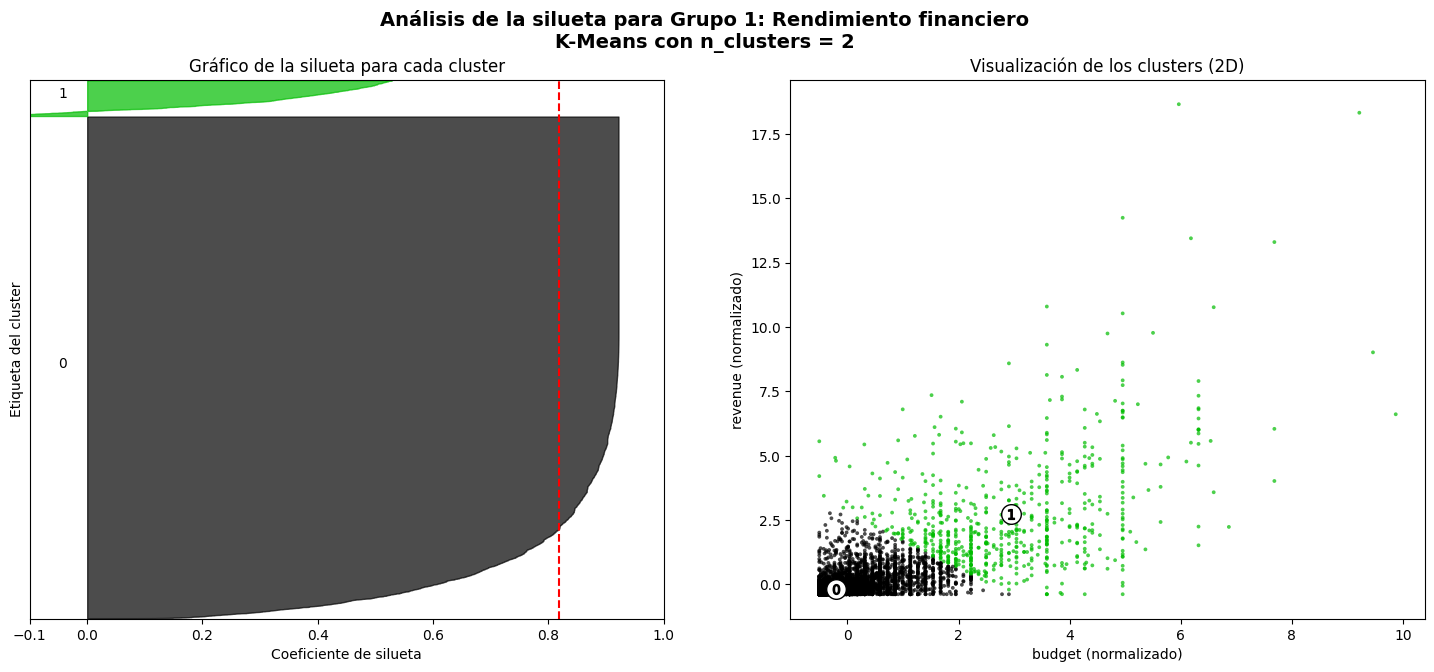

Grupo: Grupo 1: Rendimiento financiero | n_clusters = 3 | Silueta promedio = 0.7397


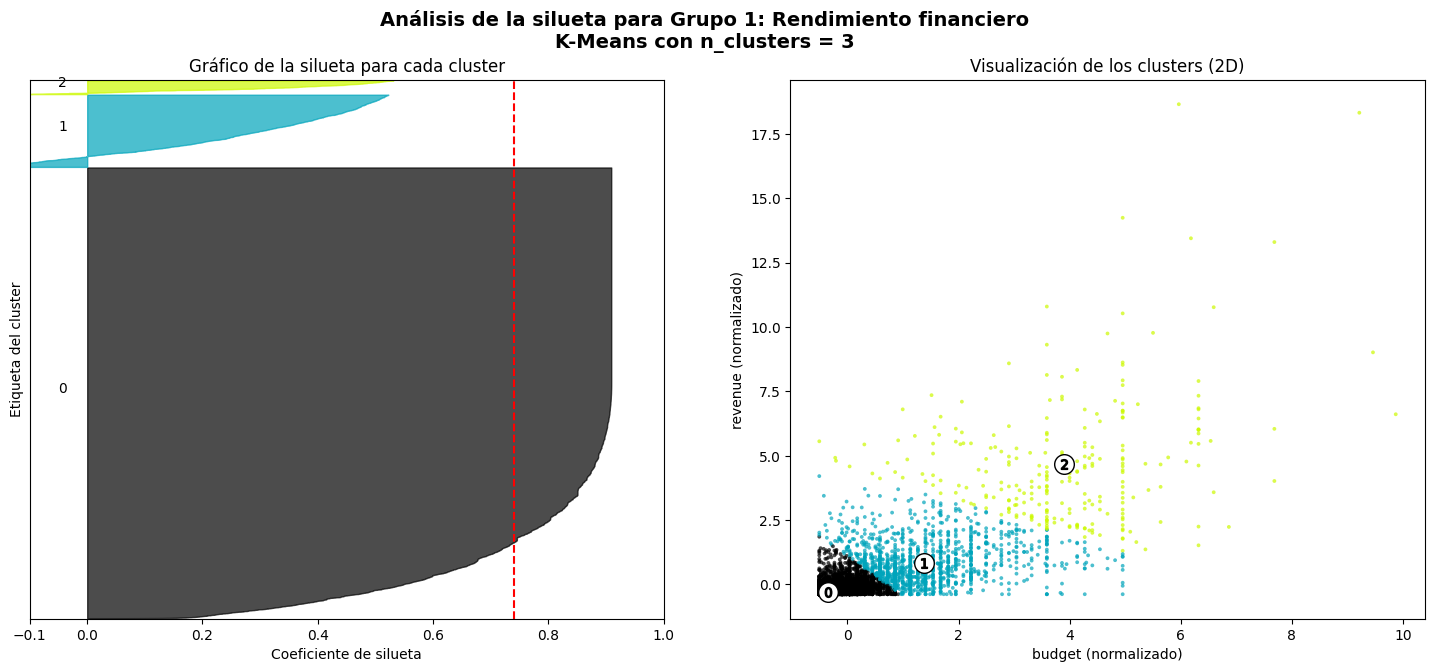

Grupo: Grupo 1: Rendimiento financiero | n_clusters = 4 | Silueta promedio = 0.7060


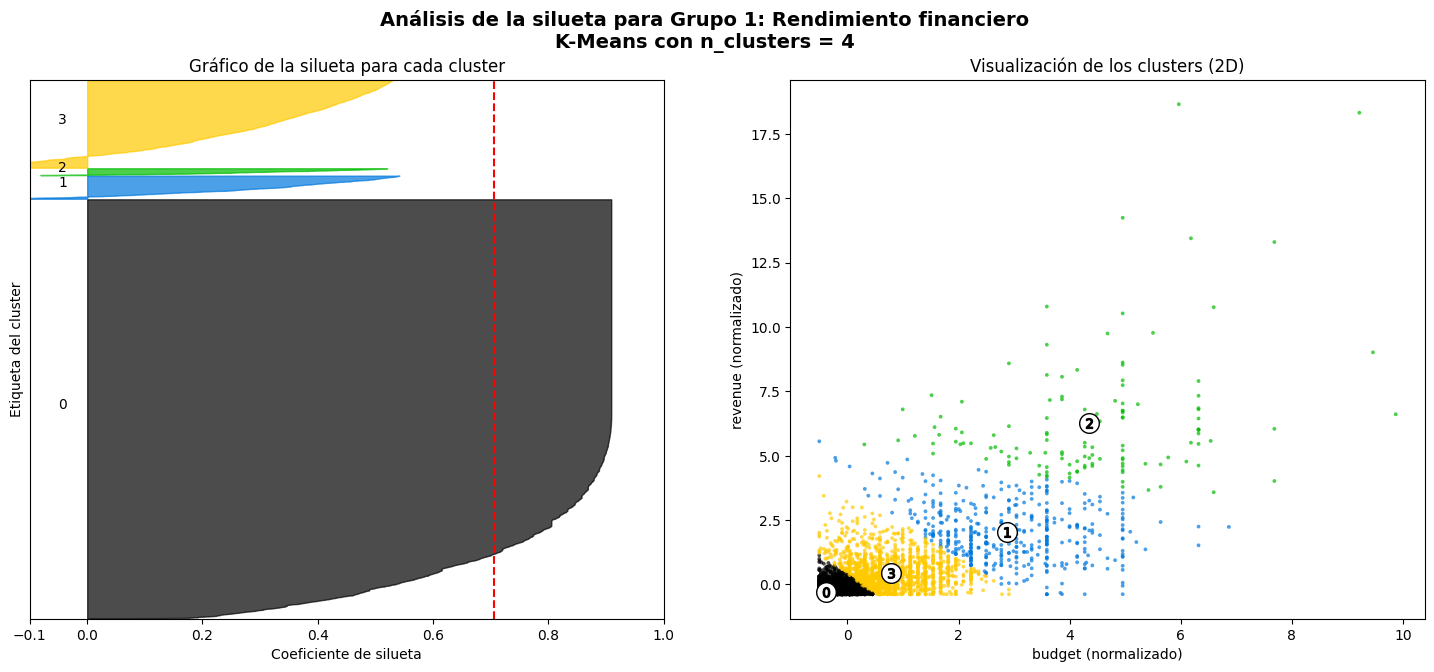

Grupo: Grupo 1: Rendimiento financiero | n_clusters = 5 | Silueta promedio = 0.6987


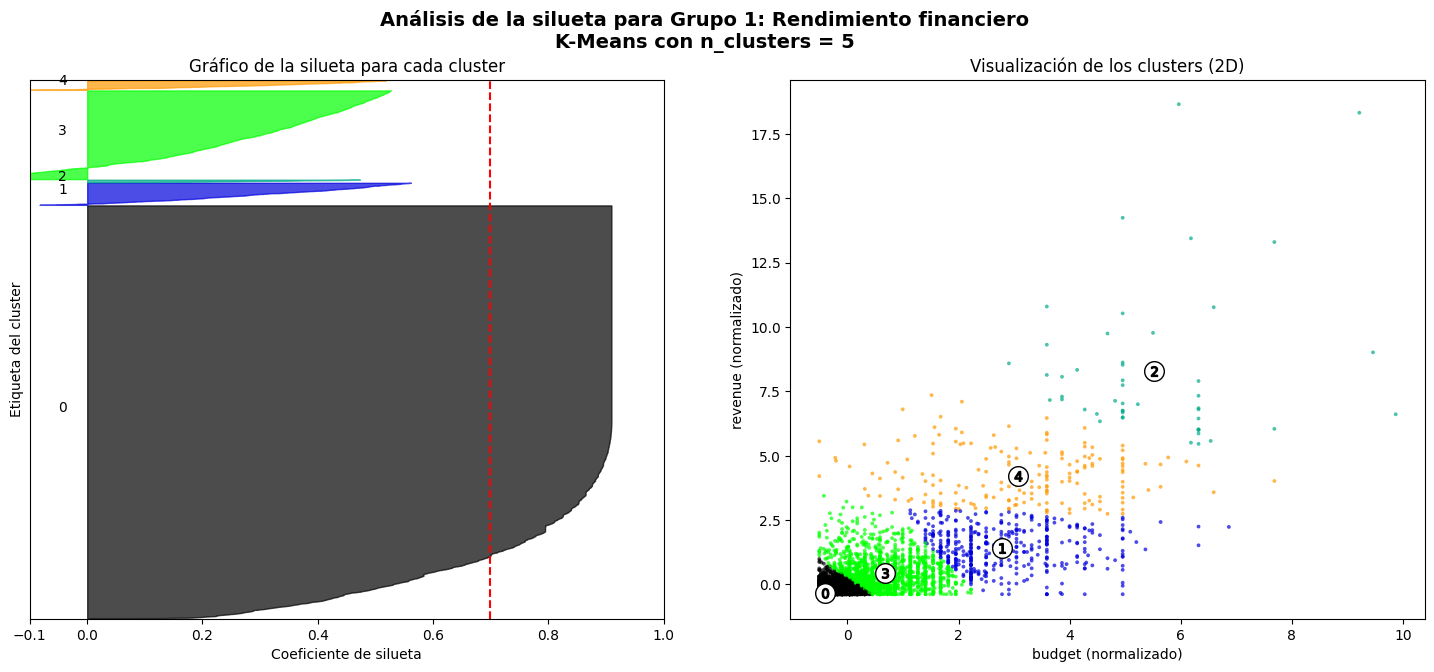

Grupo: Grupo 1: Rendimiento financiero | n_clusters = 6 | Silueta promedio = 0.6799


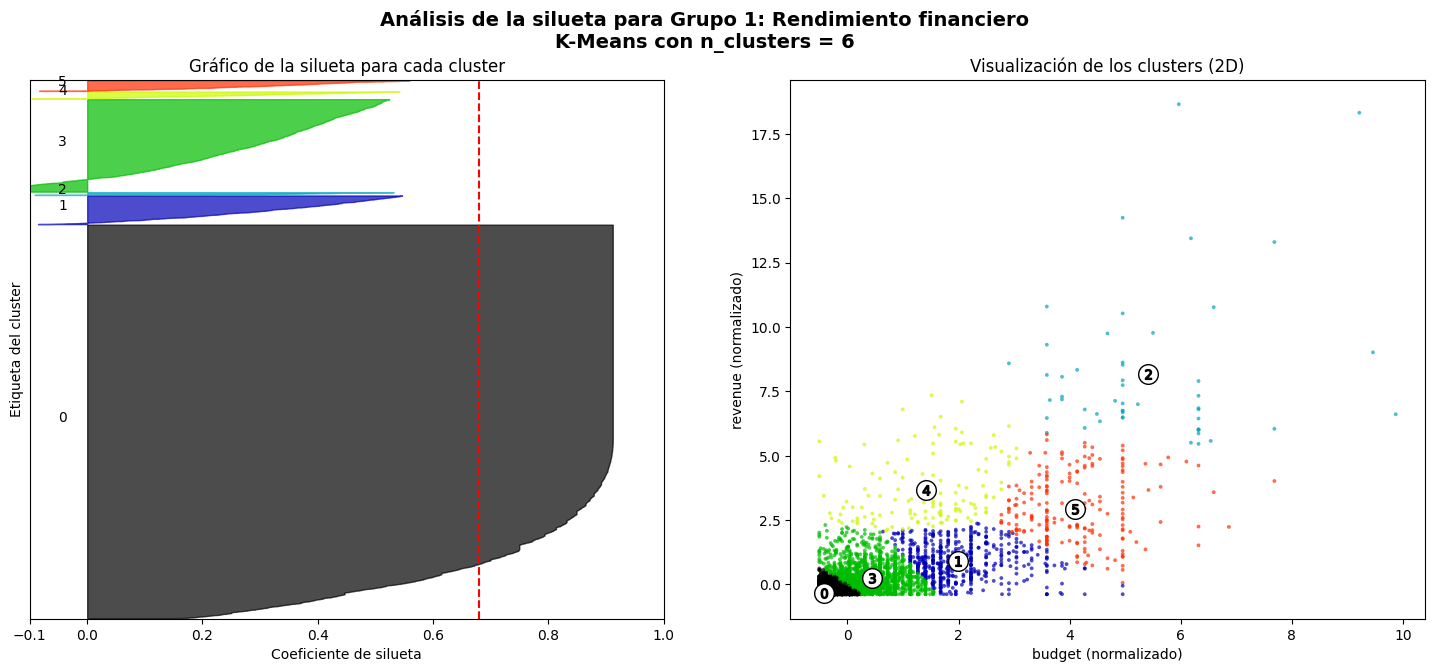

Grupo: Grupo 2: Recepción | n_clusters = 2 | Silueta promedio = 0.9583


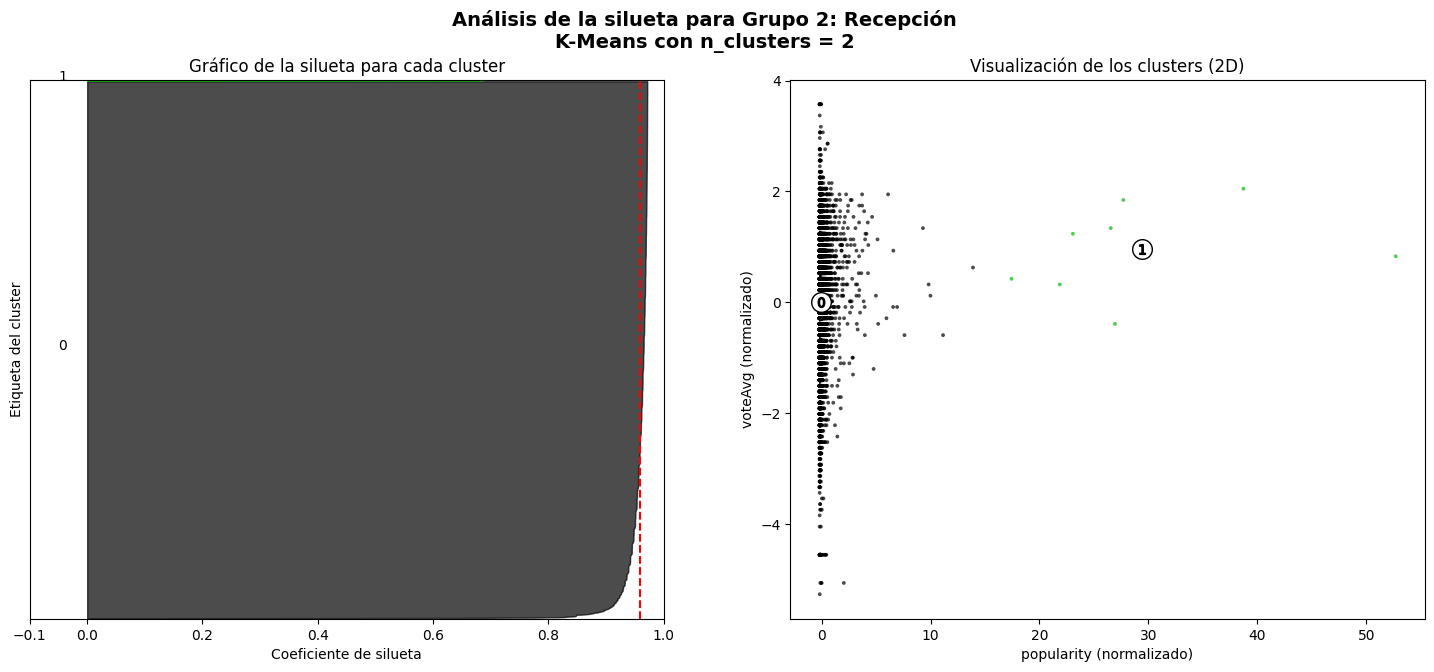

Grupo: Grupo 2: Recepción | n_clusters = 3 | Silueta promedio = 0.4983


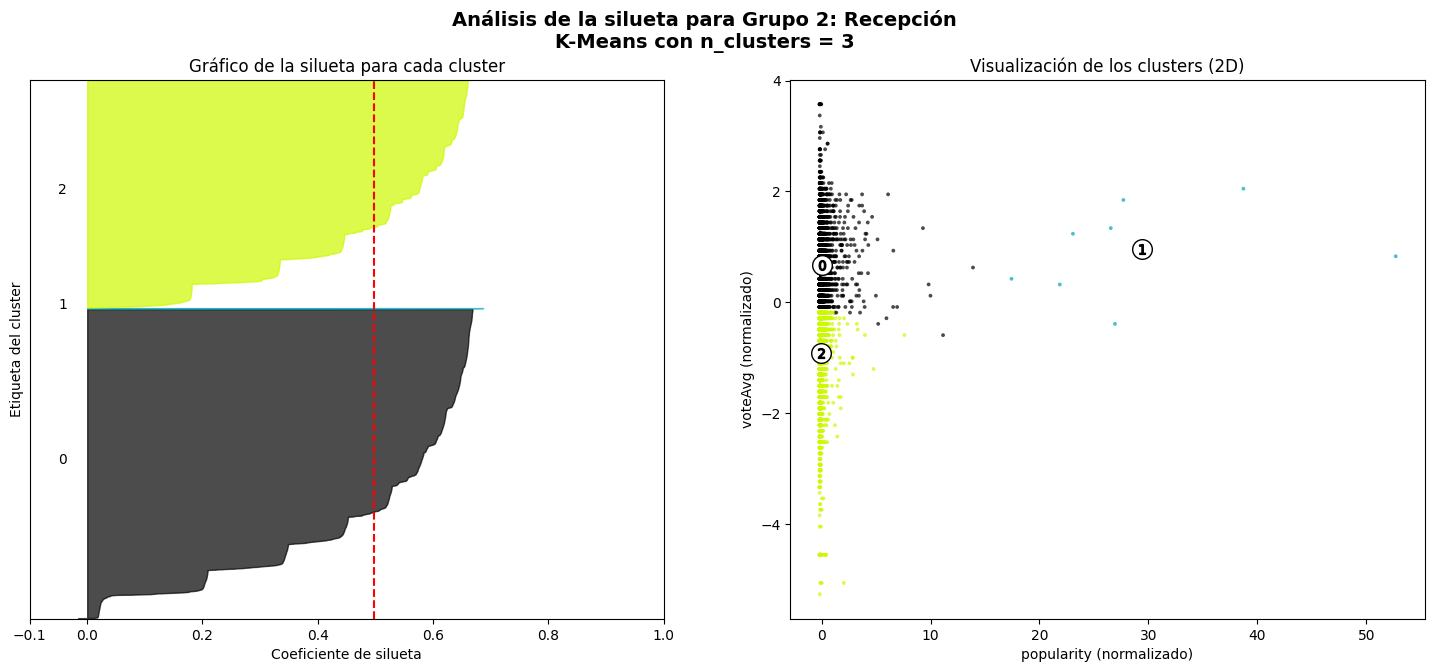

Grupo: Grupo 2: Recepción | n_clusters = 4 | Silueta promedio = 0.4549


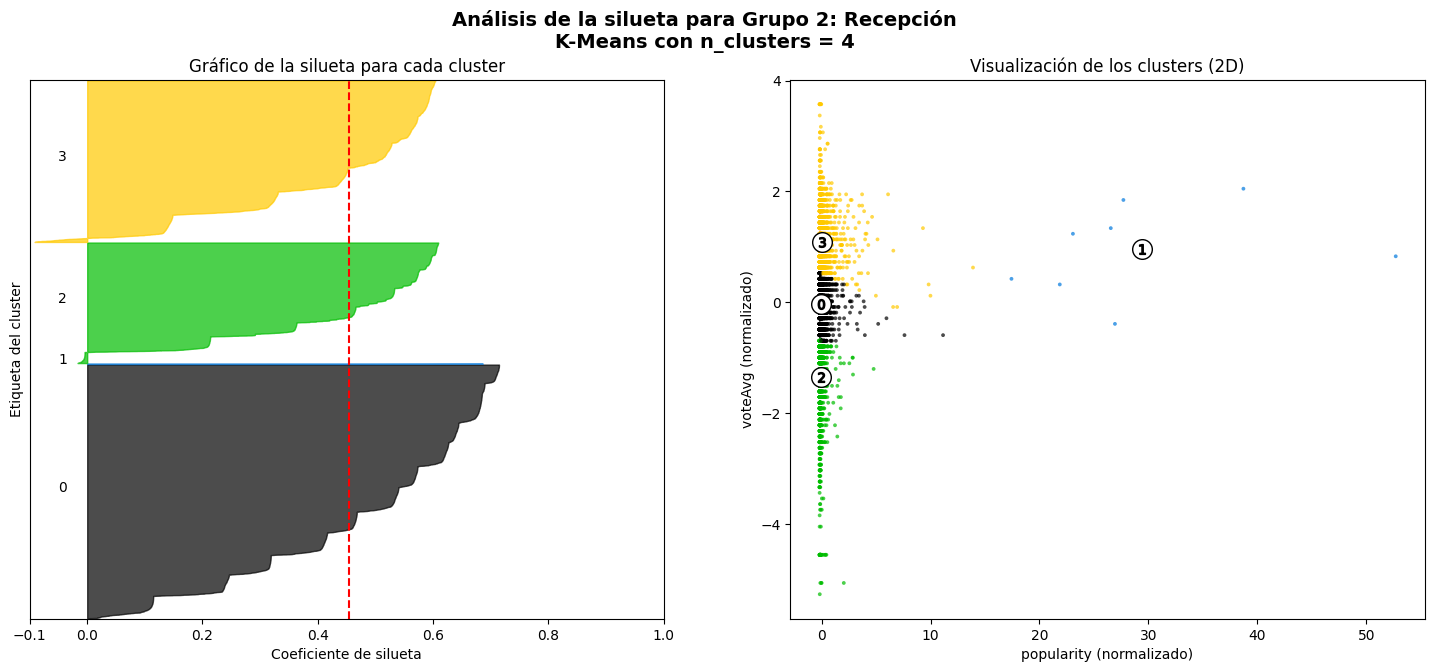

Grupo: Grupo 2: Recepción | n_clusters = 5 | Silueta promedio = 0.4562


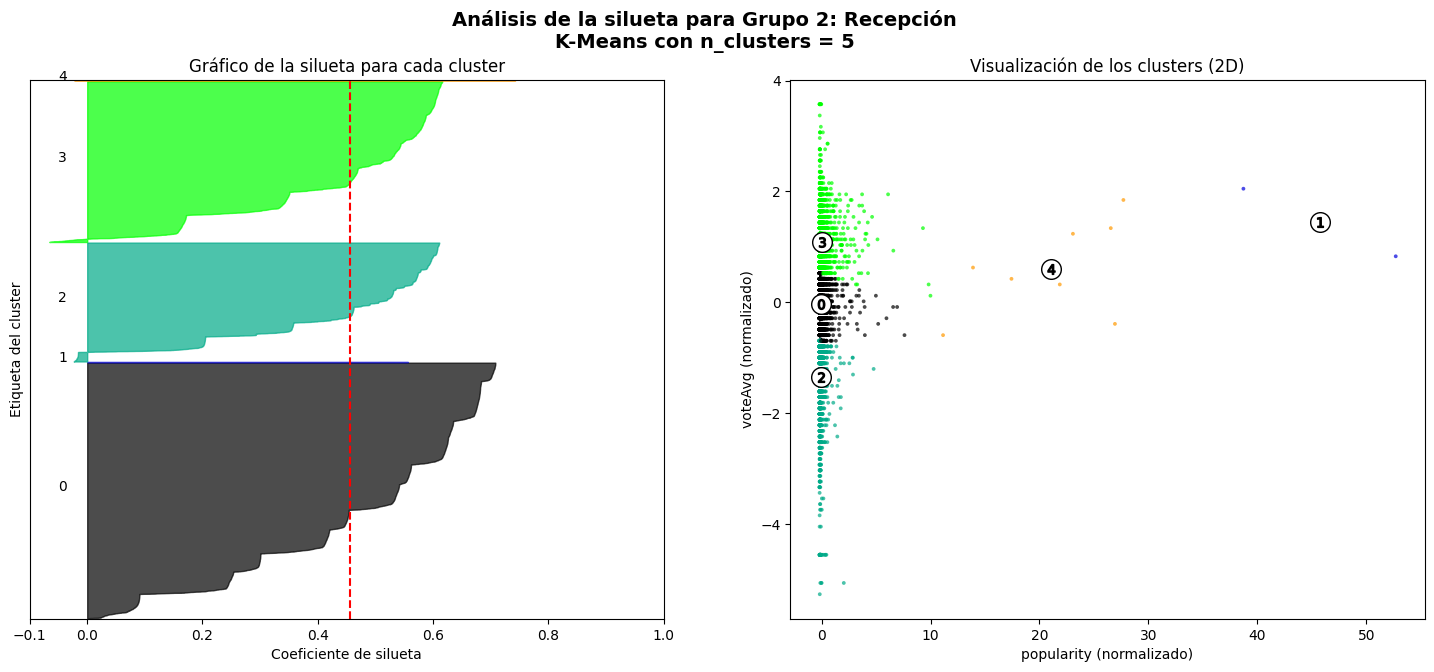

Grupo: Grupo 2: Recepción | n_clusters = 6 | Silueta promedio = 0.4406


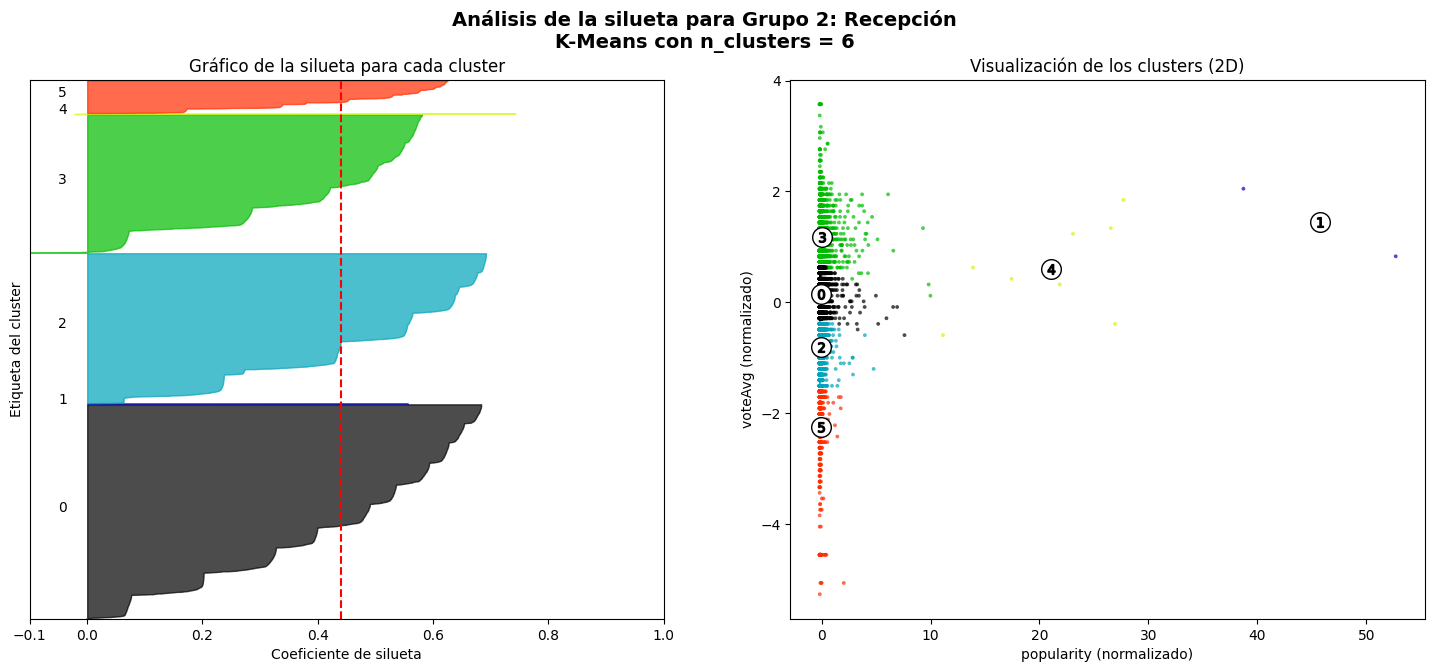

Grupo: Grupo 3: Producción 1 | n_clusters = 2 | Silueta promedio = 0.5201


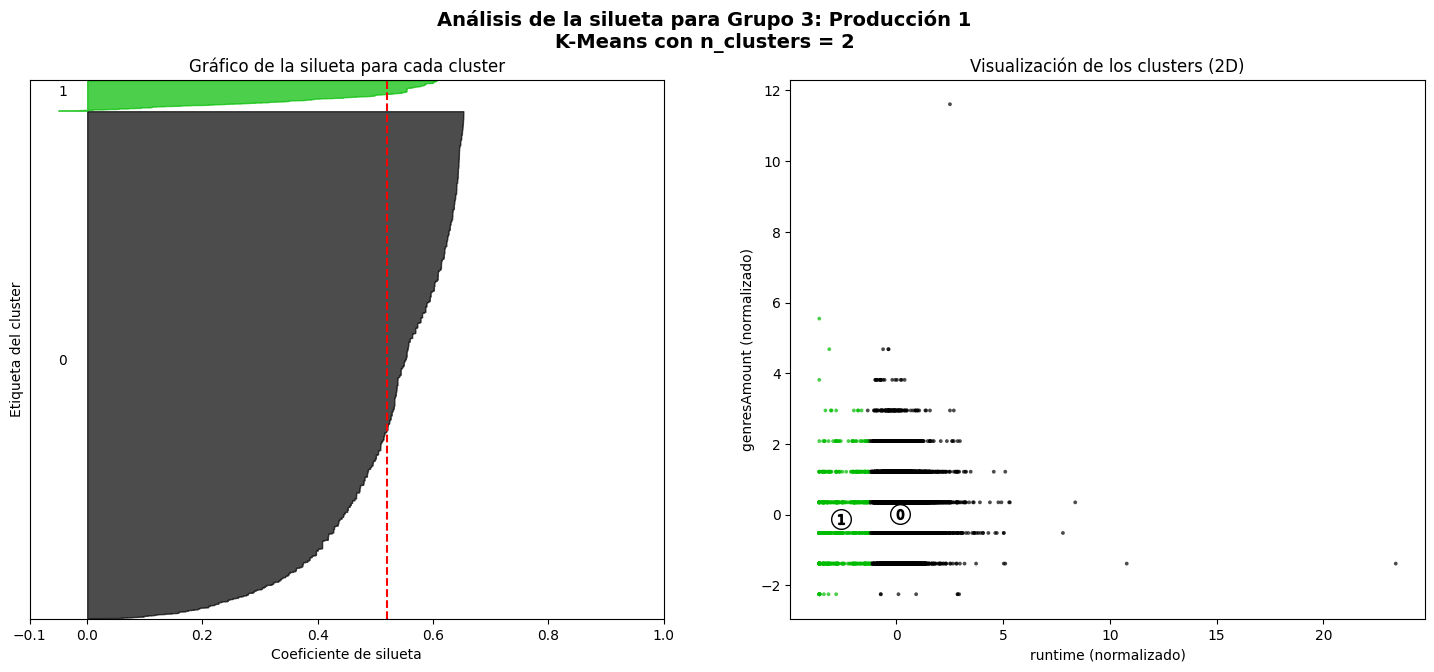

Grupo: Grupo 3: Producción 1 | n_clusters = 3 | Silueta promedio = 0.4292


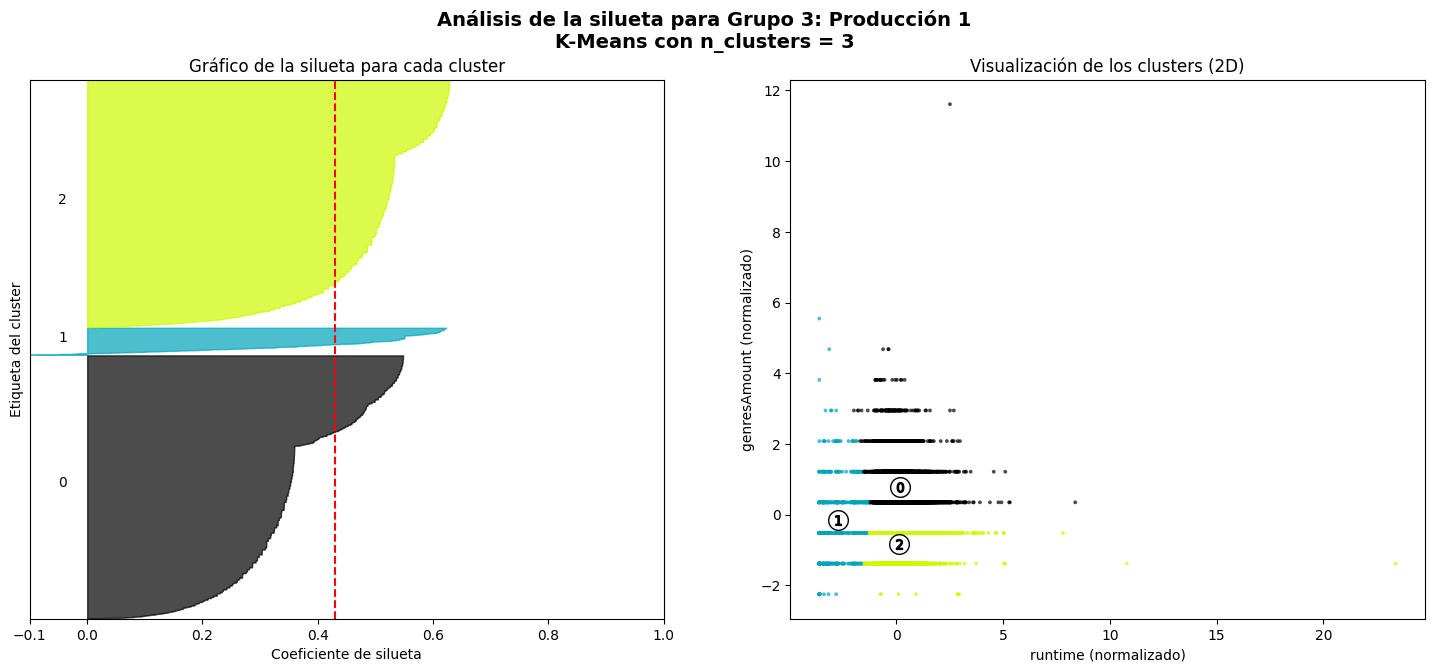

Grupo: Grupo 3: Producción 1 | n_clusters = 4 | Silueta promedio = 0.3956


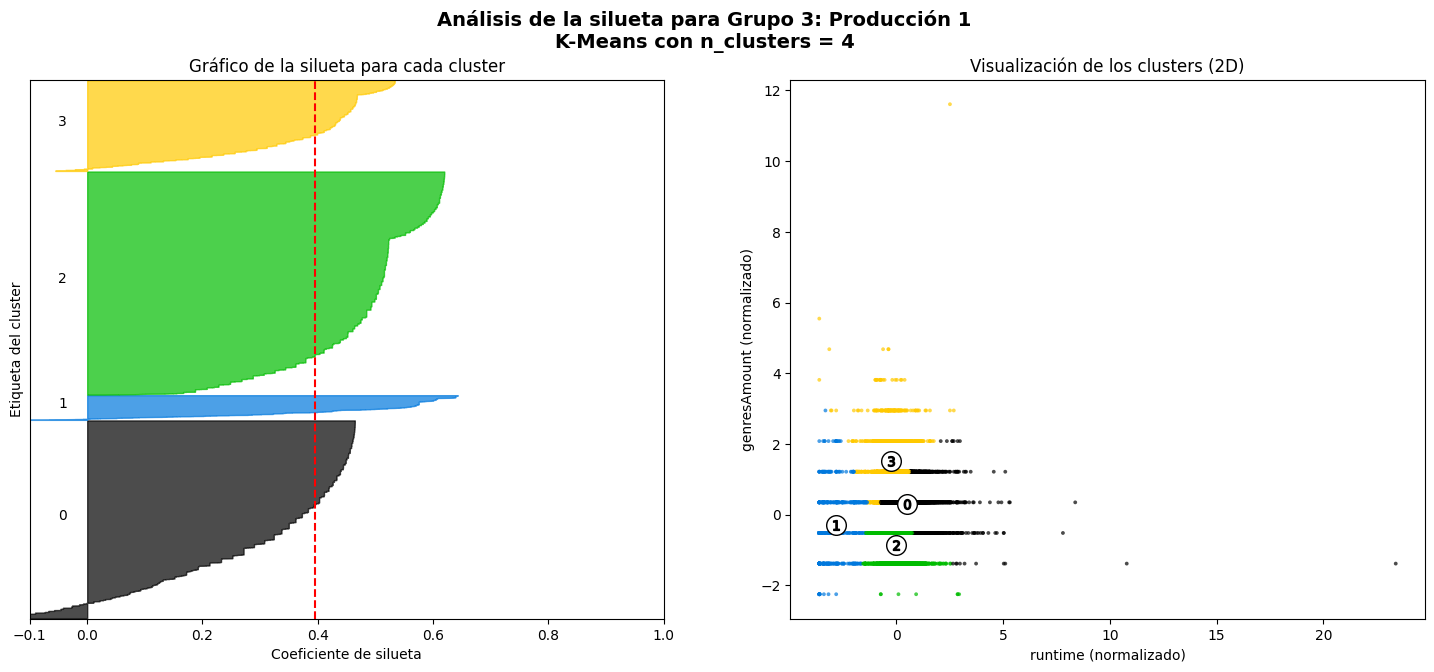

Grupo: Grupo 3: Producción 1 | n_clusters = 5 | Silueta promedio = 0.4074


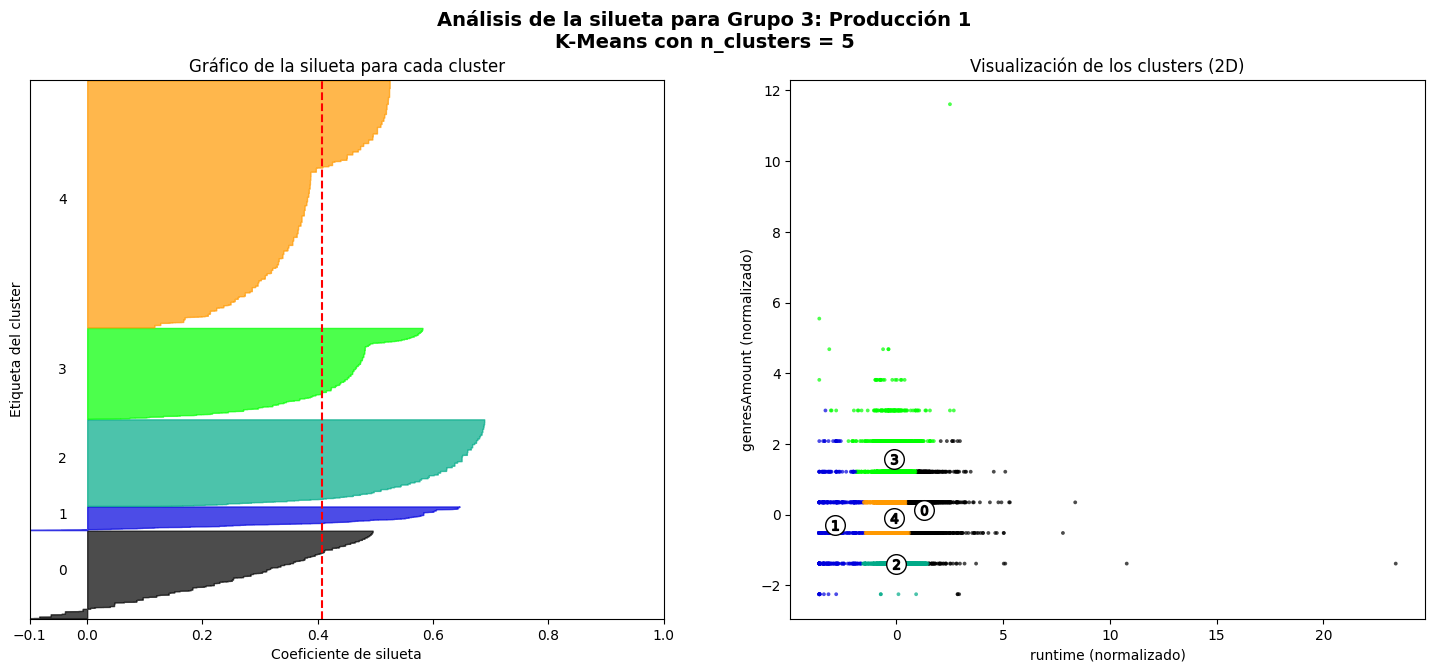

Grupo: Grupo 3: Producción 1 | n_clusters = 6 | Silueta promedio = 0.4067


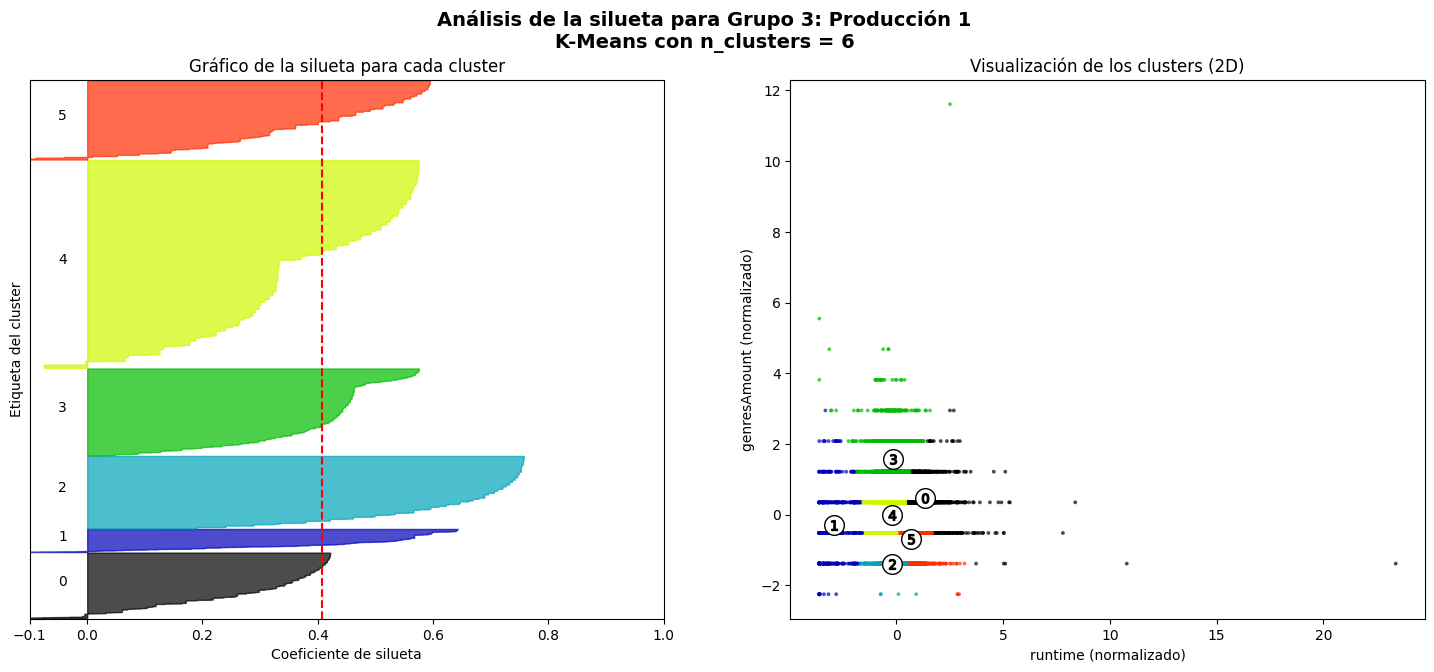

Grupo: Grupo 4: Producción 2 | n_clusters = 2 | Silueta promedio = 0.5722


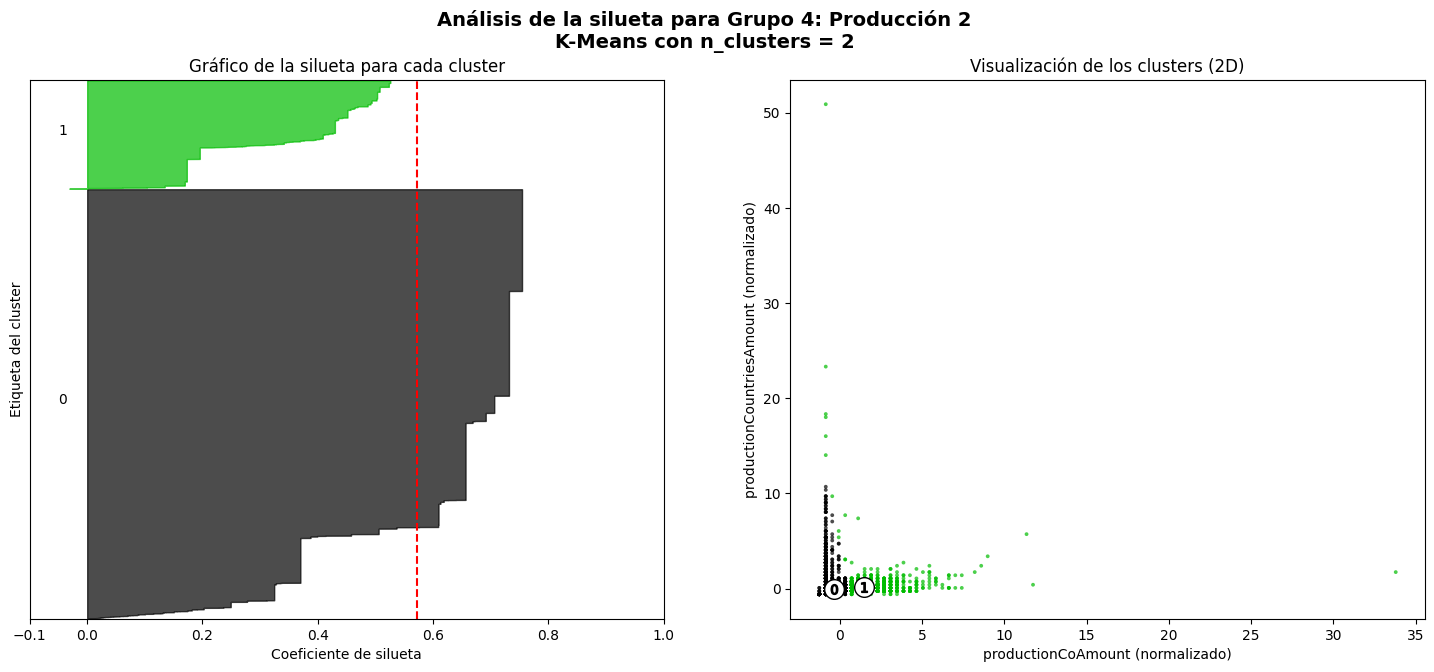

Grupo: Grupo 4: Producción 2 | n_clusters = 3 | Silueta promedio = 0.6052


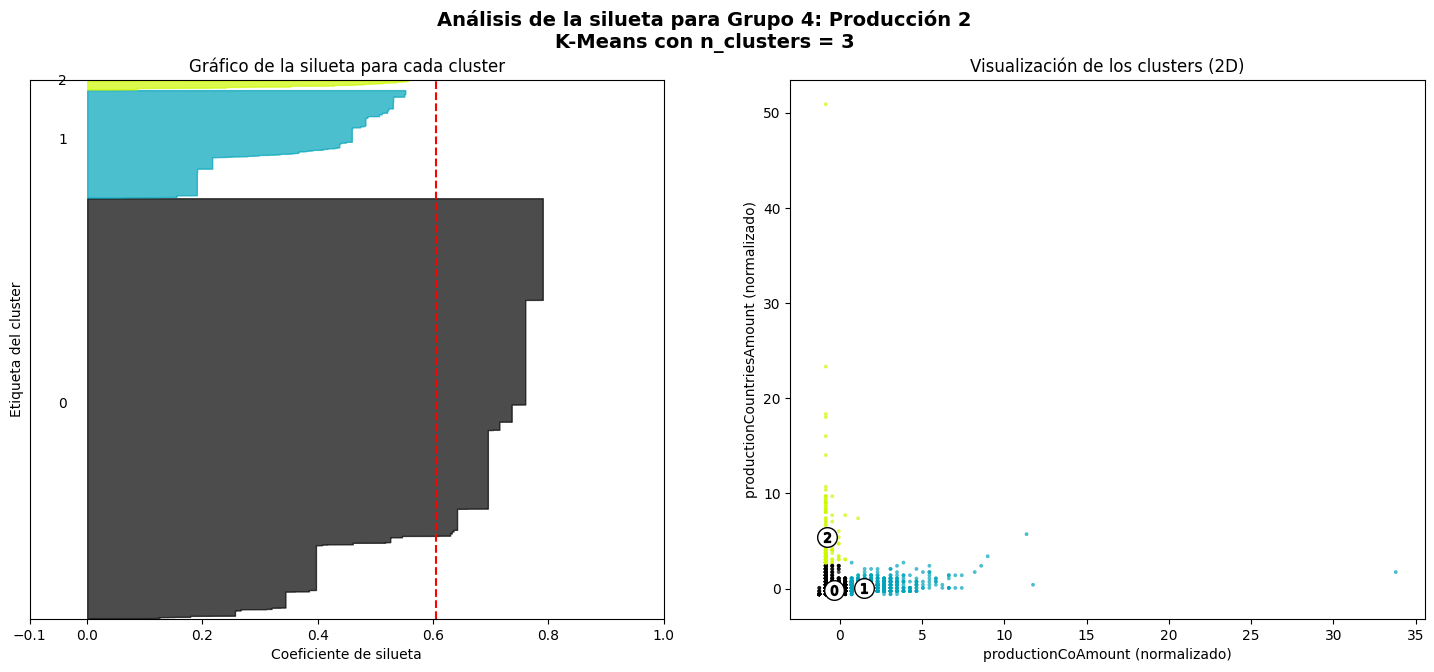

Grupo: Grupo 4: Producción 2 | n_clusters = 4 | Silueta promedio = 0.5824


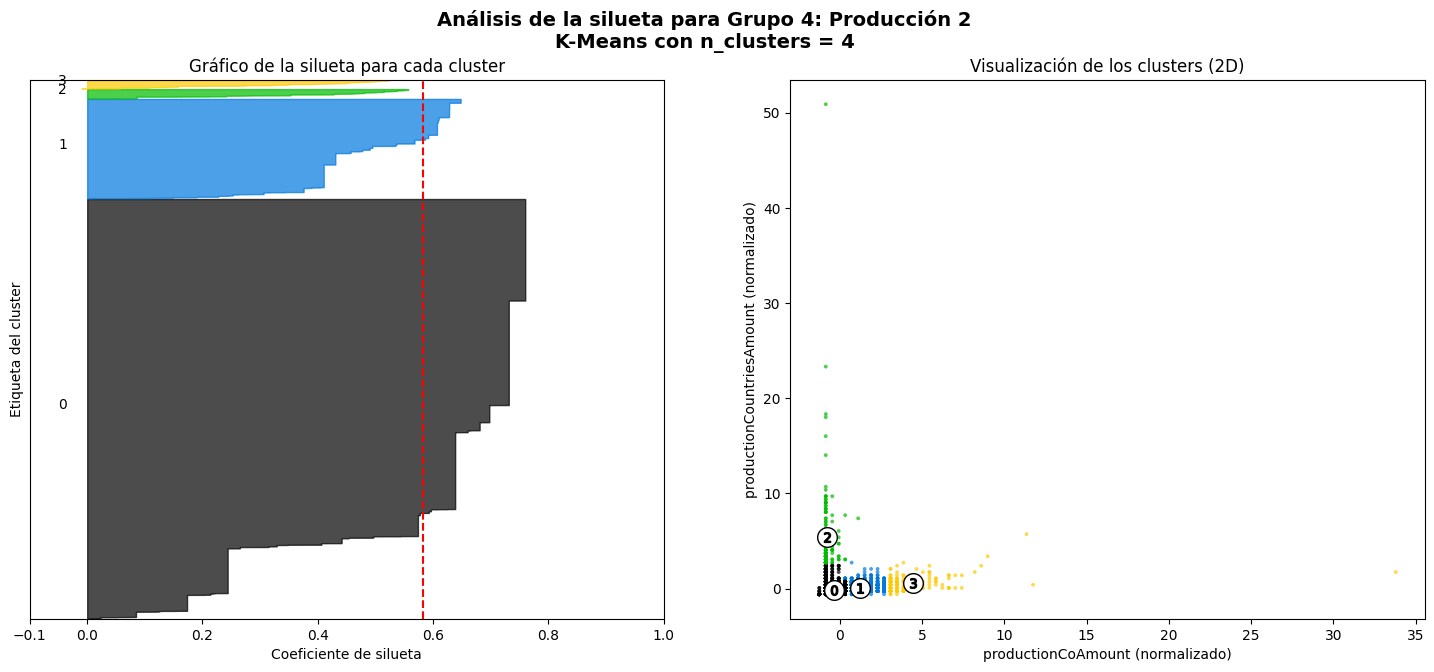

Grupo: Grupo 4: Producción 2 | n_clusters = 5 | Silueta promedio = 0.5889


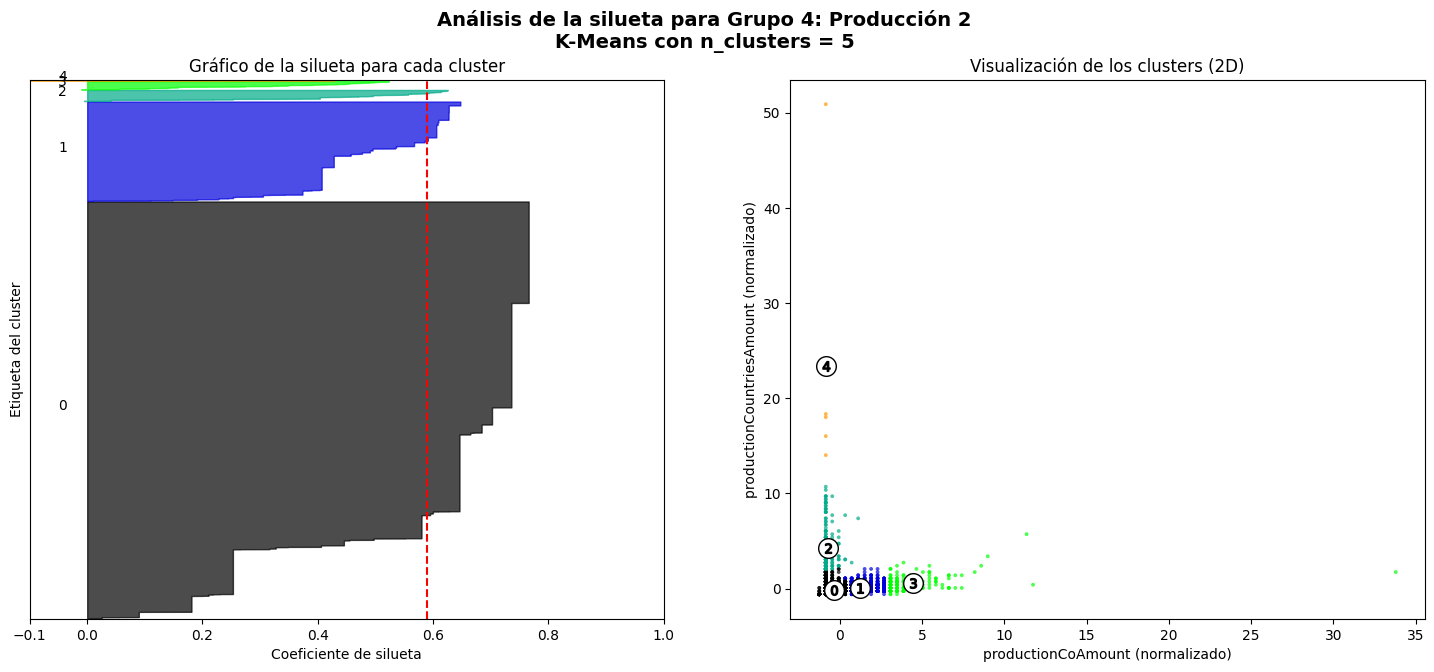

Grupo: Grupo 4: Producción 2 | n_clusters = 6 | Silueta promedio = 0.5397


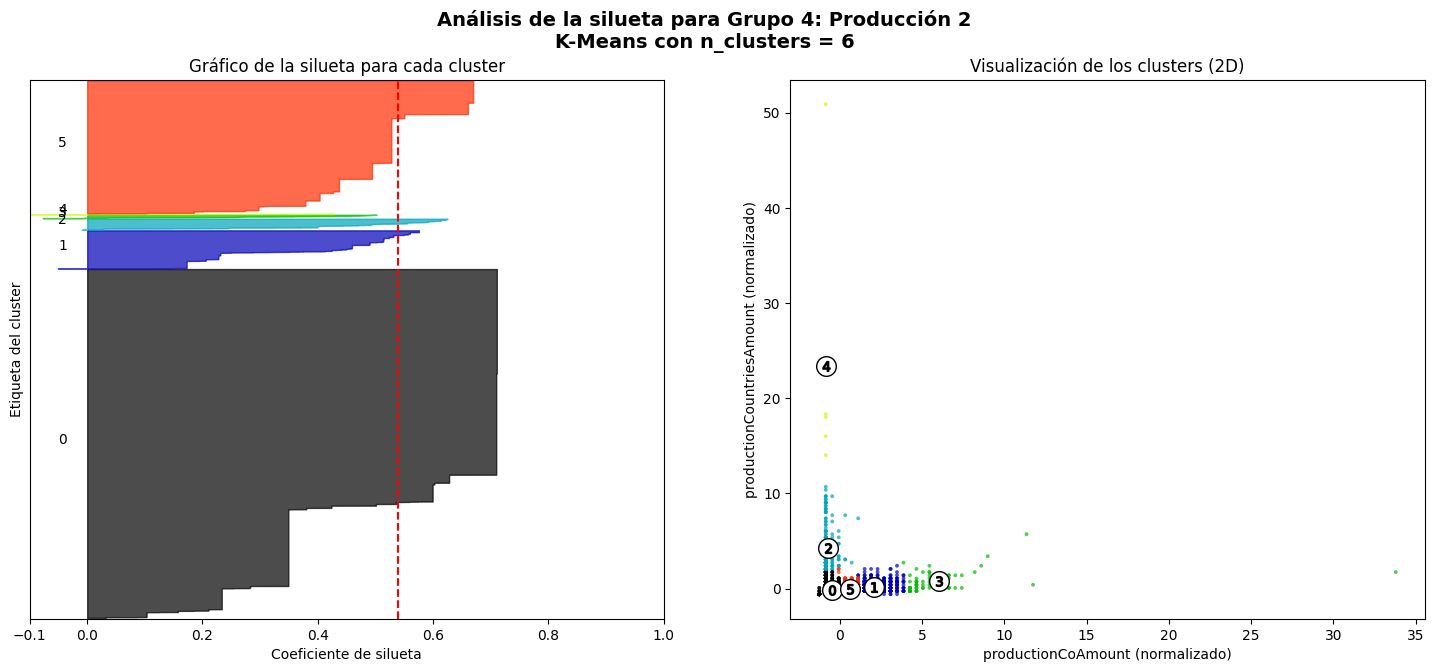

Grupo: Grupo 5: Elenco - cantidad/popularidad | n_clusters = 2 | Silueta promedio = 0.5673


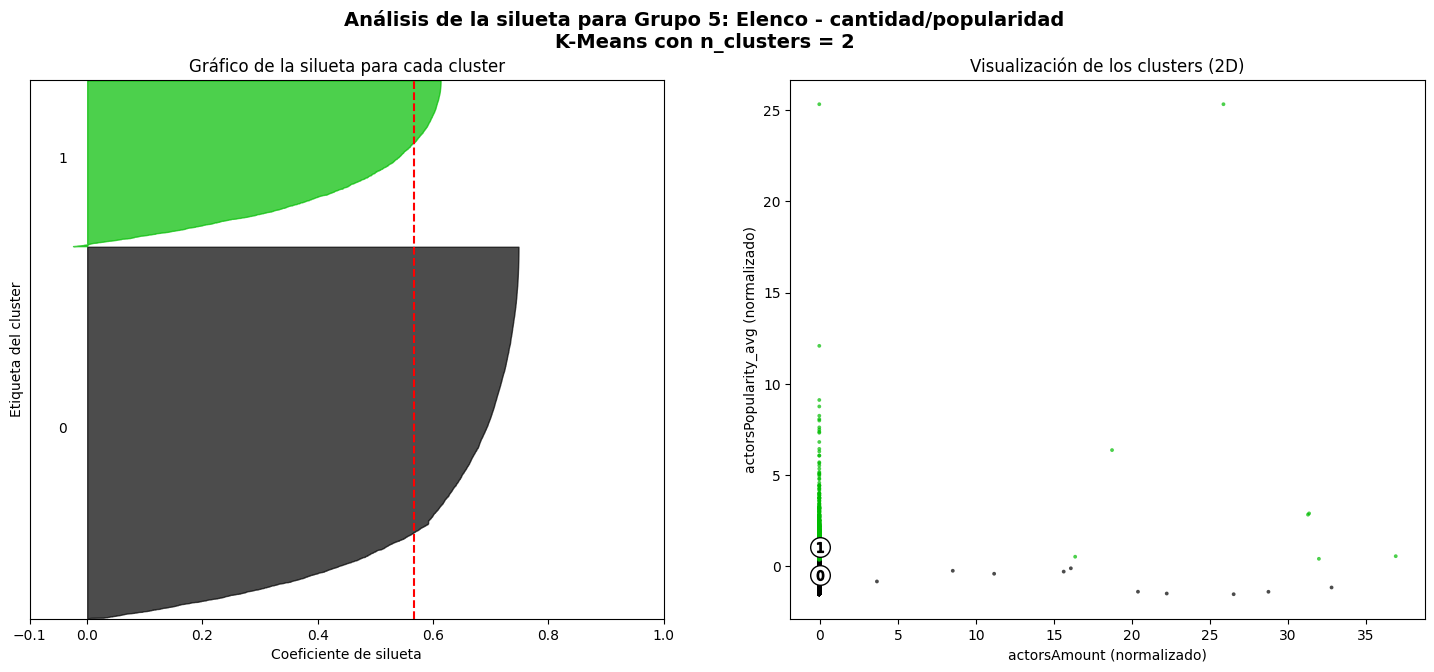

Grupo: Grupo 5: Elenco - cantidad/popularidad | n_clusters = 3 | Silueta promedio = 0.5759


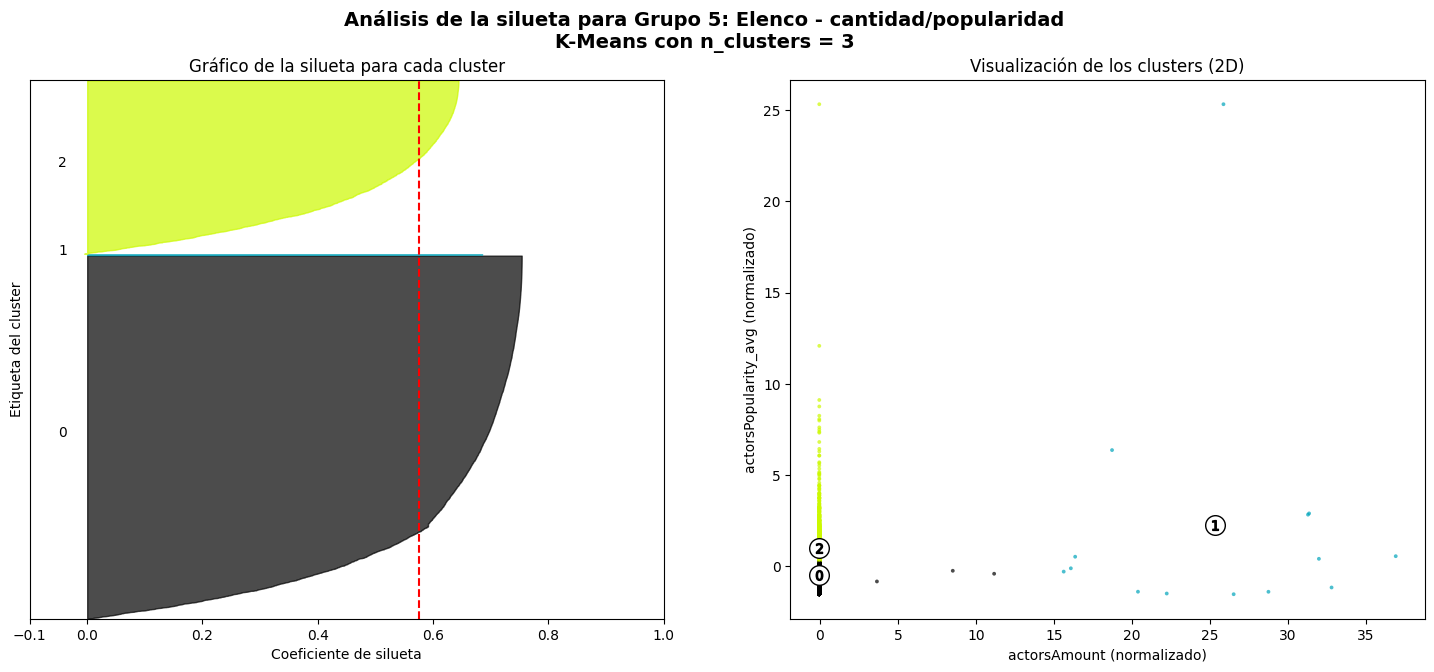

Grupo: Grupo 5: Elenco - cantidad/popularidad | n_clusters = 4 | Silueta promedio = 0.5361


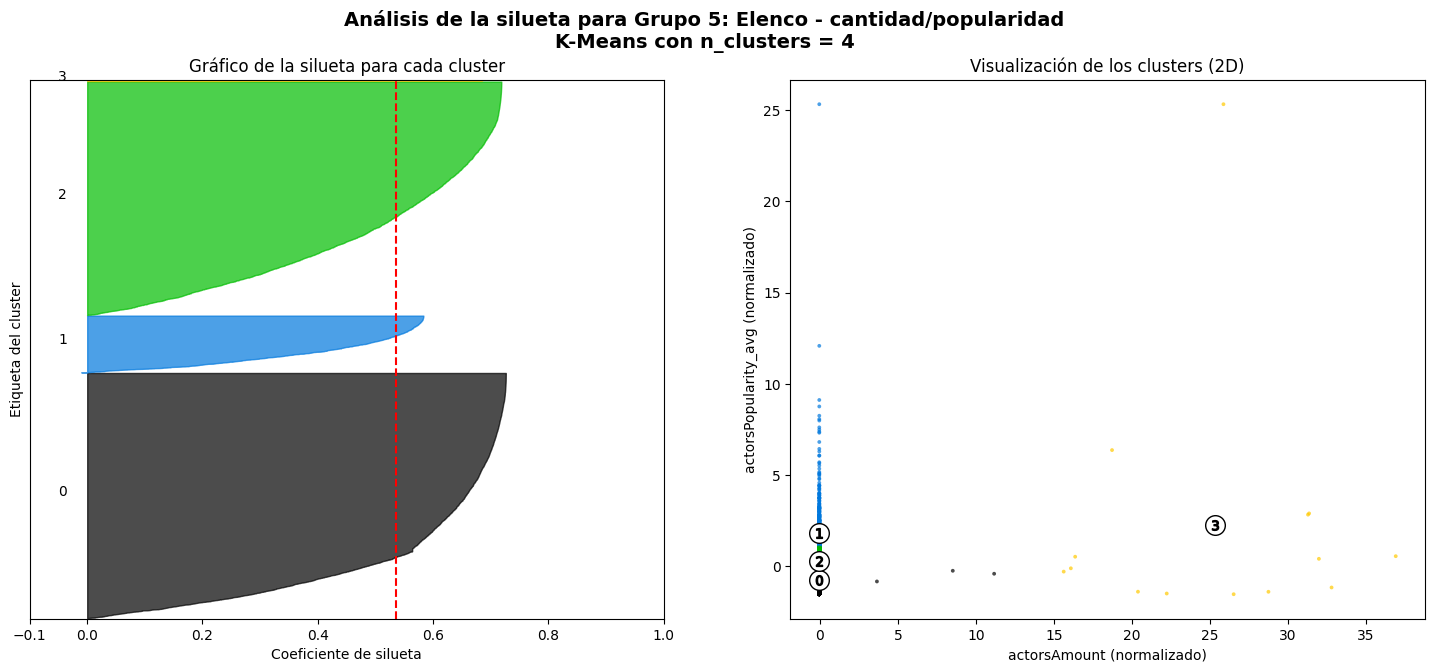

Grupo: Grupo 5: Elenco - cantidad/popularidad | n_clusters = 5 | Silueta promedio = 0.5369


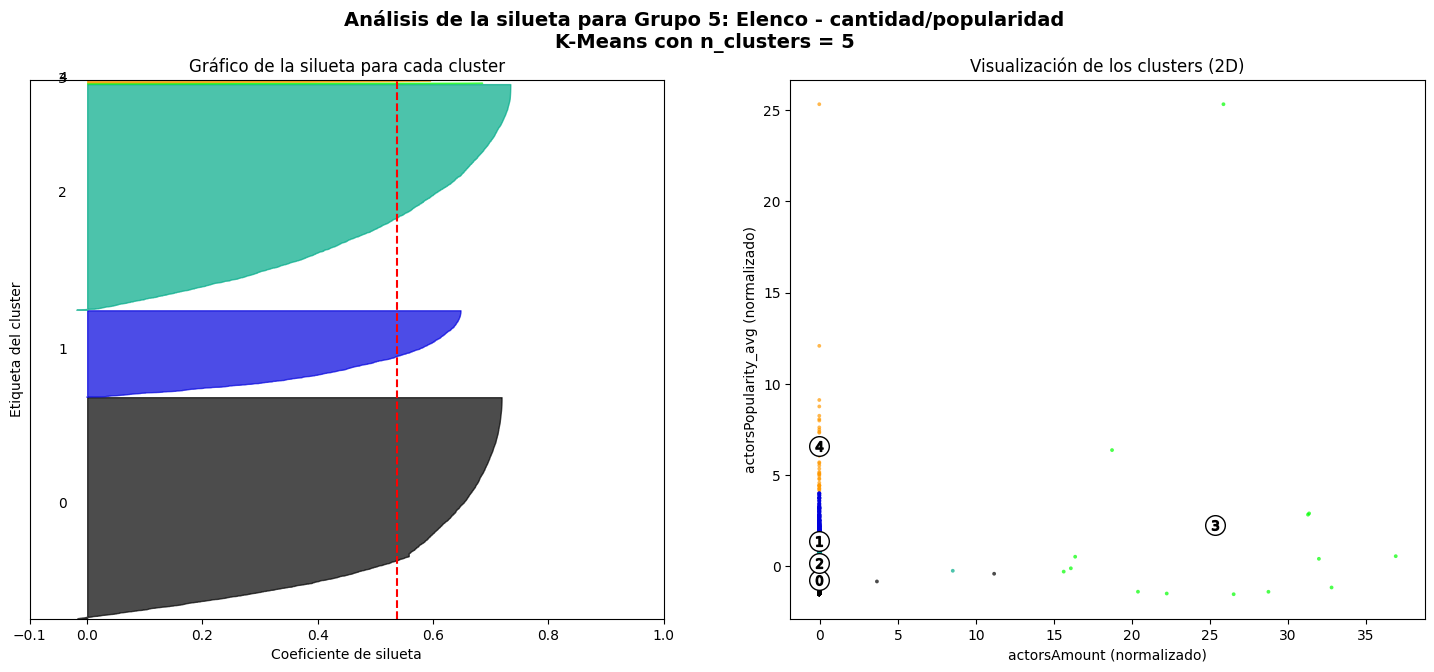

Grupo: Grupo 5: Elenco - cantidad/popularidad | n_clusters = 6 | Silueta promedio = 0.5378


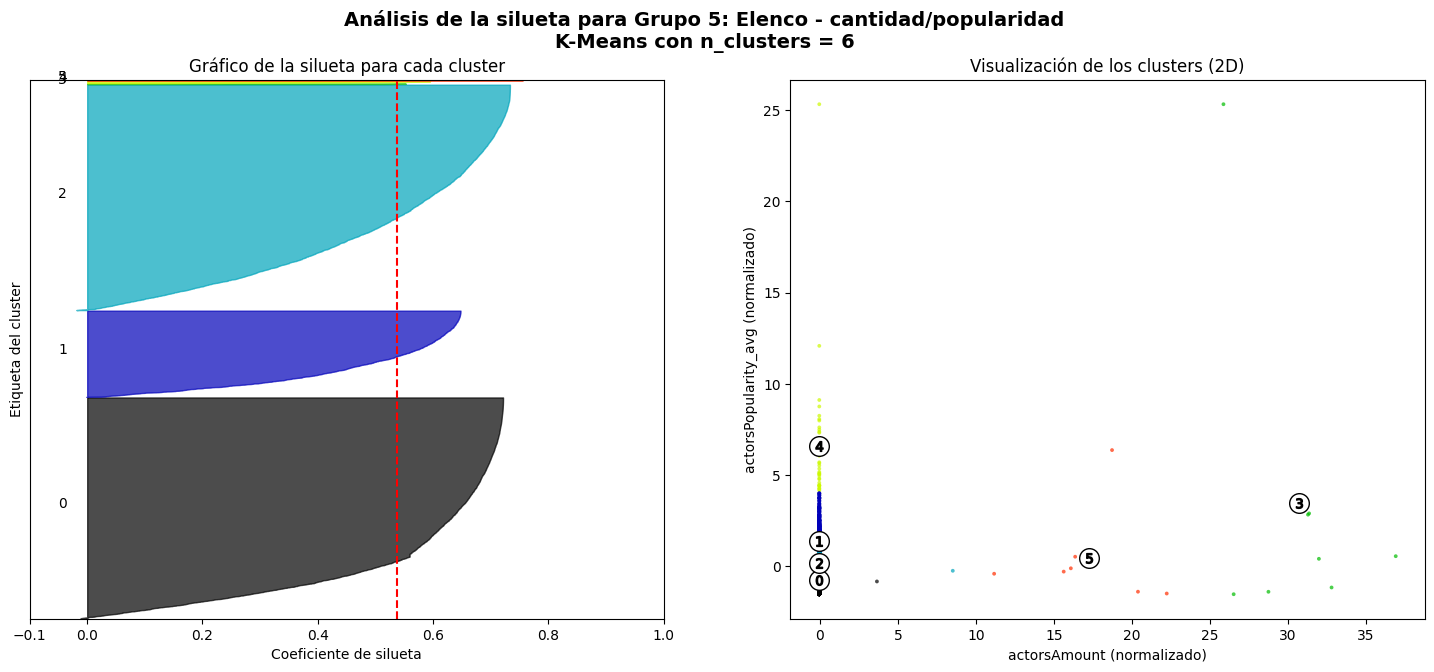

Grupo: Grupo 6: Elenco - mujeres/hombres | n_clusters = 2 | Silueta promedio = 0.5481


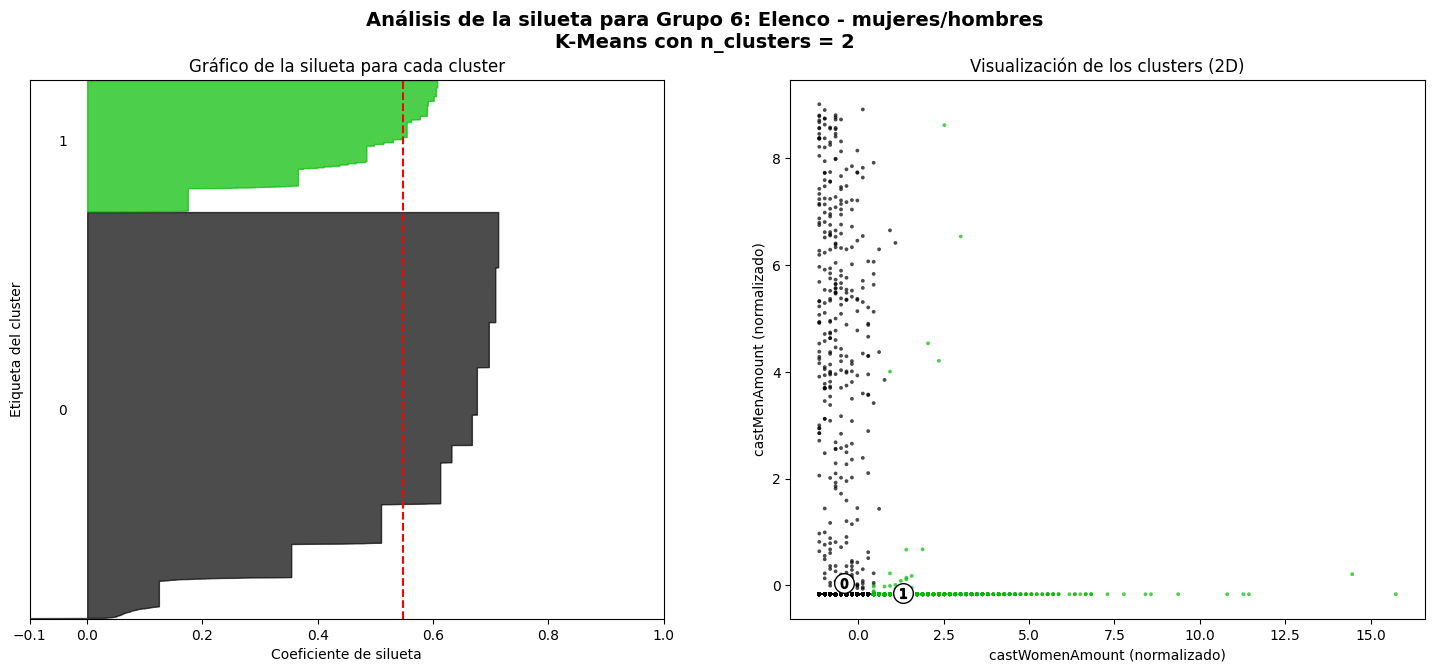

Grupo: Grupo 6: Elenco - mujeres/hombres | n_clusters = 3 | Silueta promedio = 0.6266


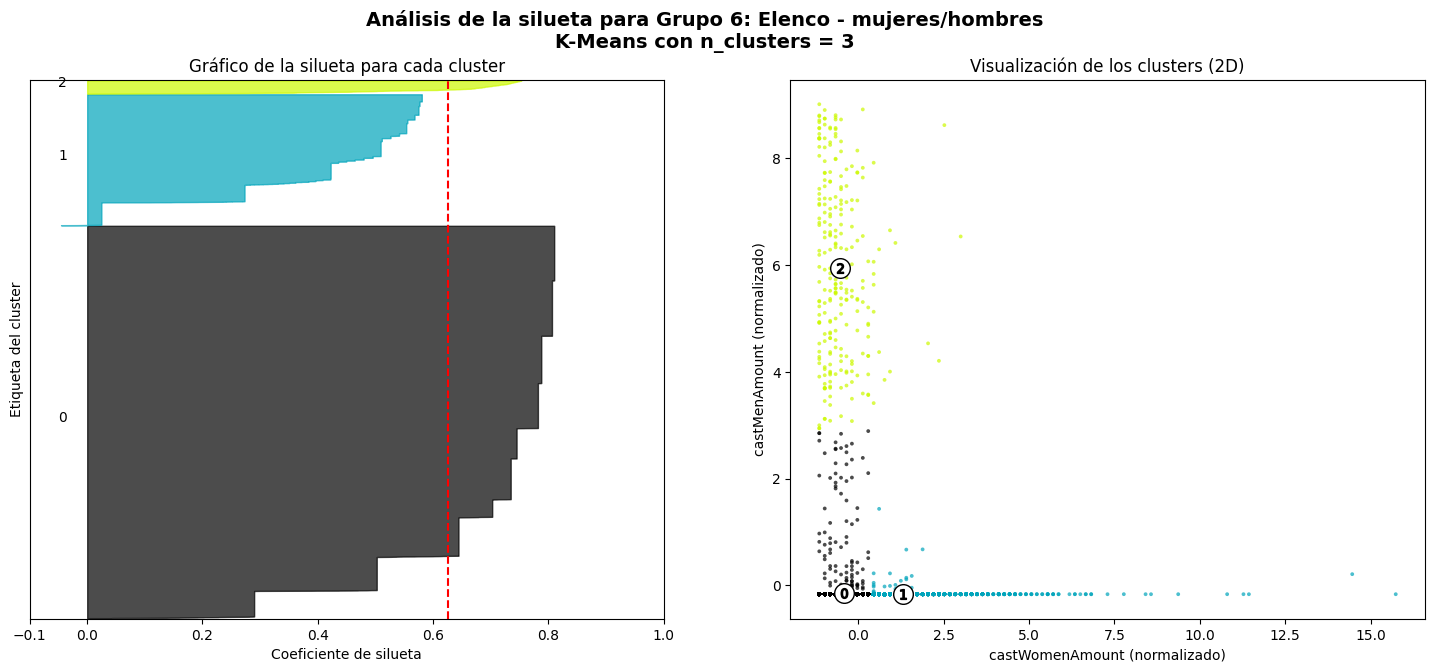

Grupo: Grupo 6: Elenco - mujeres/hombres | n_clusters = 4 | Silueta promedio = 0.5802


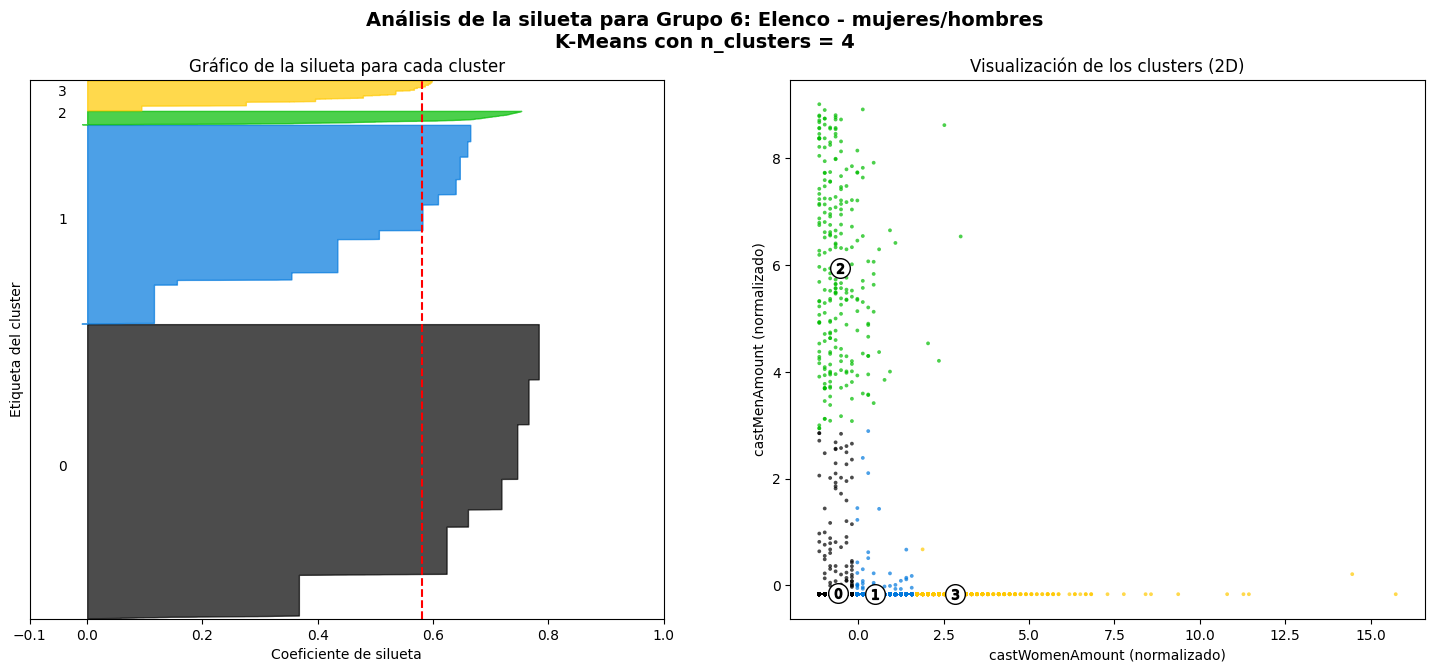

Grupo: Grupo 6: Elenco - mujeres/hombres | n_clusters = 5 | Silueta promedio = 0.5278


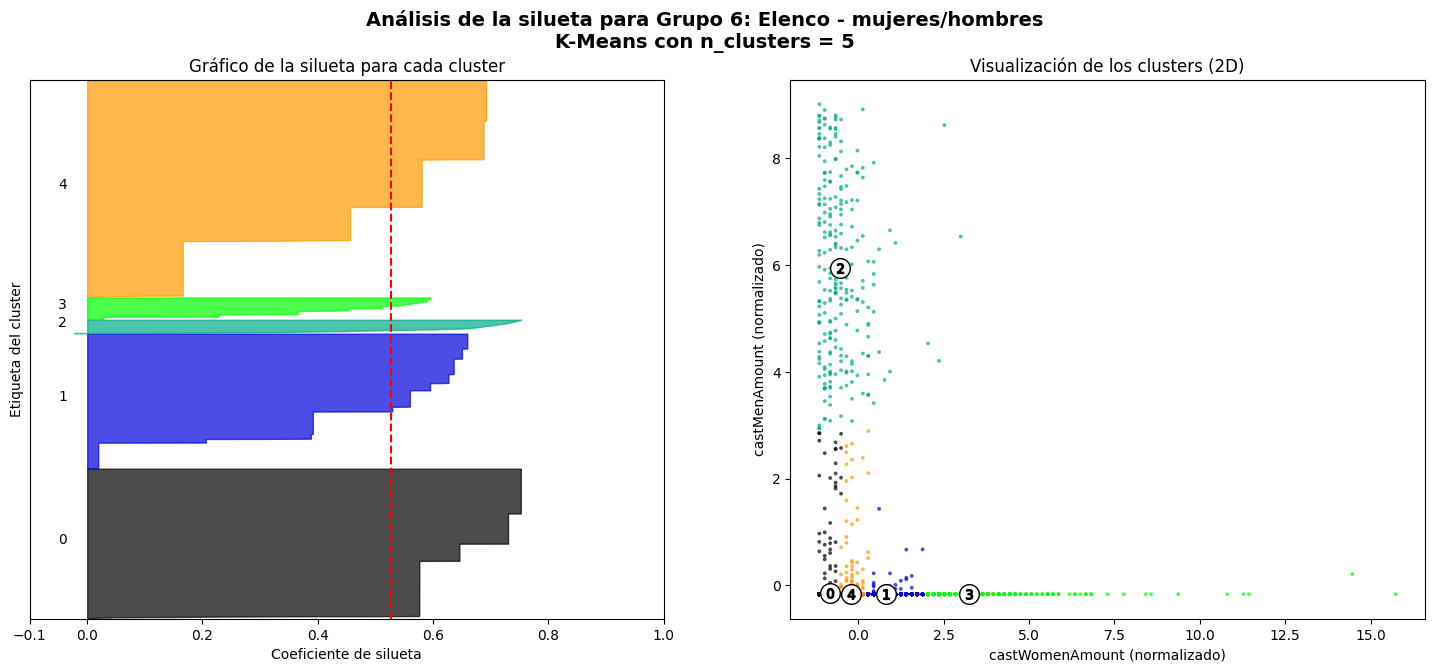

Grupo: Grupo 6: Elenco - mujeres/hombres | n_clusters = 6 | Silueta promedio = 0.5292


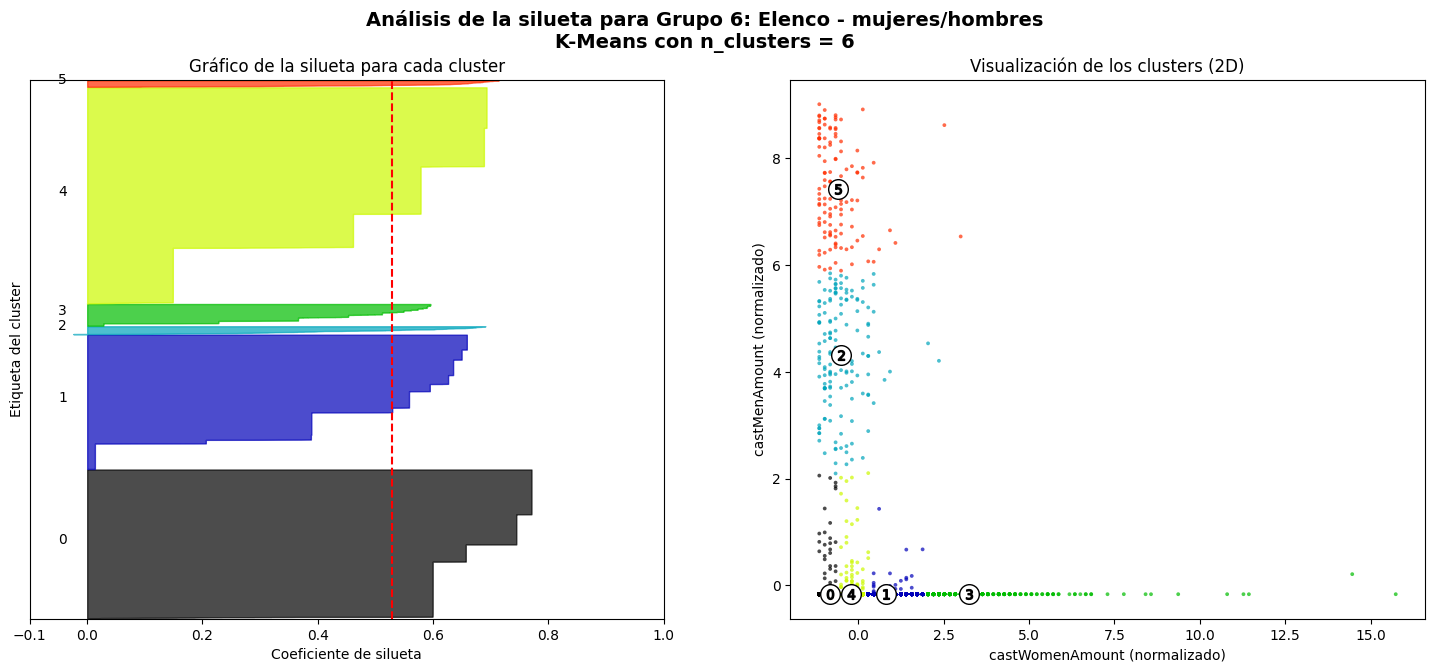

In [44]:
def silhouette_analysis_kmeans(df_group, group_label, range_n_clusters=[2, 3, 5, 6, 7]):
    # Escalar los datos
    X = scale(df_group)

    for n_clusters in range_n_clusters:
        # Crear la figura y los subplots
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Aplicar K-Means
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # Calcular el promedio de la silueta
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"Grupo: {group_label} | n_clusters = {n_clusters} | Silueta promedio = {silhouette_avg:.4f}")

        # Calcular la silueta para cada muestra
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Etiqueta del cluster en la gráfica de silueta
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax1.set_title("Gráfico de la silueta para cada cluster")
        ax1.set_xlabel("Coeficiente de silueta")
        ax1.set_ylabel("Etiqueta del cluster")

        # Línea vertical para la silueta promedio
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Sin etiquetas en el eje Y
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1],
                    marker=".", s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor="k")

        # Dibujar los centroides (tomando sólo las dos primeras columnas para graficar)
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker="o", c="white", alpha=1, s=200, edgecolor="k")

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1],
                        marker=f"${i}$", alpha=1, s=50, edgecolor="k")

        ax2.set_title("Visualización de los clusters (2D)")
        ax2.set_xlabel(f"{df_group.columns[0]} (normalizado)")
        if df_group.shape[1] > 1:
            ax2.set_ylabel(f"{df_group.columns[1]} (normalizado)")
        else:
            ax2.set_ylabel("Dimensión 2")

        plt.suptitle((f"Análisis de la silueta para {group_label}\nK-Means con n_clusters = {n_clusters}"),
                     fontsize=14, fontweight="bold")
        plt.show()


range_n_clusters = [2, 3, 4, 5, 6]  

# Grupo 1
silhouette_analysis_kmeans(df_group1, "Grupo 1: Rendimiento financiero", range_n_clusters)

# Grupo 2
silhouette_analysis_kmeans(df_group2, "Grupo 2: Recepción", range_n_clusters)

# Grupo 3
silhouette_analysis_kmeans(df_group3, "Grupo 3: Producción 1", range_n_clusters)

# Grupo 4
silhouette_analysis_kmeans(df_group4, "Grupo 4: Producción 2", range_n_clusters)

# Grupo 5
silhouette_analysis_kmeans(df_group5, "Grupo 5: Elenco - cantidad/popularidad", range_n_clusters)

# Grupo 6
silhouette_analysis_kmeans(df_group6, "Grupo 6: Elenco - mujeres/hombres", range_n_clusters)



<small>

### **Análisis del agrupamiento realizado con el método de la silueta**

Los resultados del método de la silueta en comparación con el método del codo muestran que, en la mayoría de los grupos, la cantidad de clusters seleccionada con el método del codo coincide con el mejor valor del coeficiente de silueta. Sin embargo, en el _Grupo 2 (Recepción de audiencia)_ se observa una discrepancia: mientras que el método del codo sugiere 4 clusters, el coeficiente de silueta es más alto cuando se usan solo 2 clusters. Esto sugiere que los datos pueden dividirse en dos grandes grupos naturales, probablemente películas con alta recepción y baja recepción, sin necesidad de una segmentación más detallada. Esta diferencia indica que, aunque el método del codo identifica subgrupos adicionales, estos pueden ser divisiones artificiales que no reflejan diferencias claras dentro del conjunto de datos. Ante esta situación, se pueden considerar dos enfoques: mantener la cantidad de clusters recomendada por el codo si la segmentación más detallada tiene sentido interpretativo, o utilizar 2 clusters si se busca una separación más clara y robusta de los datos. Para tomar una mejor decisión, sería útil analizar la distribución de los datos con técnicas adicionales, como PCA para visualizar la separación de los clusters o análisis de tendencias centrales dentro de cada grupo.

</small>
